## Package Importing

In [1664]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Importing

In [1665]:
crime_in = pd.read_csv('crimedata2.csv')
print(crime_in.shape)
crime_in = crime_in.replace('?', np.nan)
crime_in.head()

(2215, 147)


communityname state countyCode communityCode  fold  population  \
0  BerkeleyHeightstownship    NJ         39          5320     1       11980   
1           Marpletownship    PA         45         47616     1       23123   
2               Tigardcity    OR        NaN           NaN     1       29344   
3         Gloversvillecity    NY         35         29443     1       16656   
4              Bemidjicity    MN          7          5068     1       11245   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  burglaries  \
0           3.10          1.37         91.78          6.50  ...          14   
1           2.82          0.80         95.57          3.44  ...          57   
2           2.43          0.74         94.33          3.43  ...         274   
3           2.40          1.70         97.35          0.50  ...         225   
4           2.76          0.53         89.16          1.17  ...          91   

   burglPerPop  larcenies  larcPerPop  autoTheft  autoTheftPerPop  arsons  \
0       114.85        138     1132.08         16           131.26       2   
1       242.37        376     1598.78         26           110.55       1   
2       758.14       1797     4972.19        136            376.3      22   
3      1301.78        716     4142.56         47           271.93     NaN   
4       728.93       1060     8490.87         91           728.93       5   

   arsonsPerPop  ViolentCrimesPerPop  nonViolPerPop  
0         16.41                41.02        1394.59  
1          4.25               127.56        1955.95  
2         60.87               218.59        6167.51  
3           NaN               306.64            NaN  
4         40.05                  NaN        9988.79  

[5 rows x 147 columns]

## Data initial exploration

In [1666]:
print(crime_in.isnull().sum())
# replace null values in ViolentCrimesPerPop with knn imputation
from sklearn.impute import KNNImputer

columns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'murdPerPop',
           'assaultPerPop', 'rapesPerPop','ViolentCrimesPerPop']
# imputer = KNNImputer(n_neighbors=3)
# crime_in['ViolentCrimesPerPop'] = imputer.fit_transform(crime_in[['ViolentCrimesPerPop']])
crime_in = crime_in.dropna(subset = ['ViolentCrimesPerPop'])
crime_in[columns] = crime_in[columns].astype(float)
print(crime_in['ViolentCrimesPerPop'])
# convert columns to float
crime_in = crime_in[columns].interpolate()
print(crime_in.head())

communityname             0
state                     0
countyCode             1221
communityCode          1224
fold                      0
                       ... 
autoTheftPerPop           3
arsons                   91
arsonsPerPop             91
ViolentCrimesPerPop     221
nonViolPerPop            97
Length: 147, dtype: int64
0        41.02
1       127.56
2       218.59
3       306.64
5       442.95
         ...  
2210    545.75
2211    124.10
2212    353.83
2213    691.17
2214    918.89
Name: ViolentCrimesPerPop, Length: 1994, dtype: float64
   agePct12t29  PctLess9thGrade  PctNotHSGrad  PctBSorMore  population  \
0        21.44             5.81          9.90        48.18     11980.0   
1        21.30             5.61         13.72        29.89     23123.0   
2        25.88             2.80          9.09        30.13     29344.0   
3        25.20            11.05         33.68        10.81     16656.0   
5        32.89             8.76         23.03        20.66    140494.0   



In [1667]:
crime_in.head()
print(crime_in.shape)

(1994, 9)


In [1668]:
crime_in.describe()

agePct12t29  PctLess9thGrade  PctNotHSGrad  PctBSorMore    population  \
count  1994.000000      1994.000000   1994.000000  1994.000000  1.994000e+03   
mean     27.617357         9.444203     22.700687    22.991550  5.225143e+04   
std       6.148044         6.843854     11.061712    12.514273  2.021475e+05   
min       9.380000         0.200000      2.090000     1.630000  1.000500e+04   
25%      24.380000         4.770000     14.195000    14.090000  1.435925e+04   
50%      26.765000         7.920000     21.655000    19.625000  2.268100e+04   
75%      29.180000        12.245000     29.665000    28.935000  4.315375e+04   
max      70.510000        49.890000     73.660000    73.630000  7.322564e+06   

        murdPerPop  assaultPerPop  rapesPerPop  ViolentCrimesPerPop  
count  1994.000000    1994.000000  1994.000000          1994.000000  
mean      5.981364     380.644724    36.248245           589.078922  
std       9.131550     416.373512    34.255538           614.784518  
min       0.000000       0.000000     0.000000             0.000000  
25%       0.000000      94.870000    11.582500           161.700000  
50%       2.500000     237.065000    26.930000           374.060000  
75%       8.632500     519.647500    51.427500           794.400000  
max      91.090000    3486.140000   401.350000          4877.060000

In [1669]:
columns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'murdPerPop',
           'assaultPerPop', 'rapesPerPop','ViolentCrimesPerPop']
crime_in[columns] = crime_in[columns].astype(float)

In [1670]:
crime_in.loc[(crime_in['population'] >= 10000) & (crime_in['population'] < 25000), 'size'] = 'small'
crime_in.loc[(crime_in['population'] >= 25001) & (crime_in['population'] < 50000), 'size'] = 'medium'
crime_in.loc[(crime_in['population'] >= 50001) & (crime_in['population'] < 200000), 'size'] = 'large'
crime_in.loc[crime_in['population'] >= 200000, 'size'] = 'superLarge'
crime_in.head()

agePct12t29  PctLess9thGrade  PctNotHSGrad  PctBSorMore  population  \
0        21.44             5.81          9.90        48.18     11980.0   
1        21.30             5.61         13.72        29.89     23123.0   
2        25.88             2.80          9.09        30.13     29344.0   
3        25.20            11.05         33.68        10.81     16656.0   
5        32.89             8.76         23.03        20.66    140494.0   

   murdPerPop  assaultPerPop  rapesPerPop  ViolentCrimesPerPop    size  
0        0.00          32.81         0.00                41.02   small  
1        0.00         102.05         4.25               127.56   small  
2        8.30          38.74        16.60               218.59  medium  
3        0.00         190.93        57.86               306.64   small  
5        4.63         297.29        50.98               442.95   large

In [1671]:
columns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'murdPerPop',
           'assaultPerPop', 'rapesPerPop','ViolentCrimesPerPop', 'size']
crime_in[columns].describe()

agePct12t29  PctLess9thGrade  PctNotHSGrad  PctBSorMore    population  \
count  1994.000000      1994.000000   1994.000000  1994.000000  1.994000e+03   
mean     27.617357         9.444203     22.700687    22.991550  5.225143e+04   
std       6.148044         6.843854     11.061712    12.514273  2.021475e+05   
min       9.380000         0.200000      2.090000     1.630000  1.000500e+04   
25%      24.380000         4.770000     14.195000    14.090000  1.435925e+04   
50%      26.765000         7.920000     21.655000    19.625000  2.268100e+04   
75%      29.180000        12.245000     29.665000    28.935000  4.315375e+04   
max      70.510000        49.890000     73.660000    73.630000  7.322564e+06   

        murdPerPop  assaultPerPop  rapesPerPop  ViolentCrimesPerPop  
count  1994.000000    1994.000000  1994.000000          1994.000000  
mean      5.981364     380.644724    36.248245           589.078922  
std       9.131550     416.373512    34.255538           614.784518  
min       0.000000       0.000000     0.000000             0.000000  
25%       0.000000      94.870000    11.582500           161.700000  
50%       2.500000     237.065000    26.930000           374.060000  
75%       8.632500     519.647500    51.427500           794.400000  
max      91.090000    3486.140000   401.350000          4877.060000

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

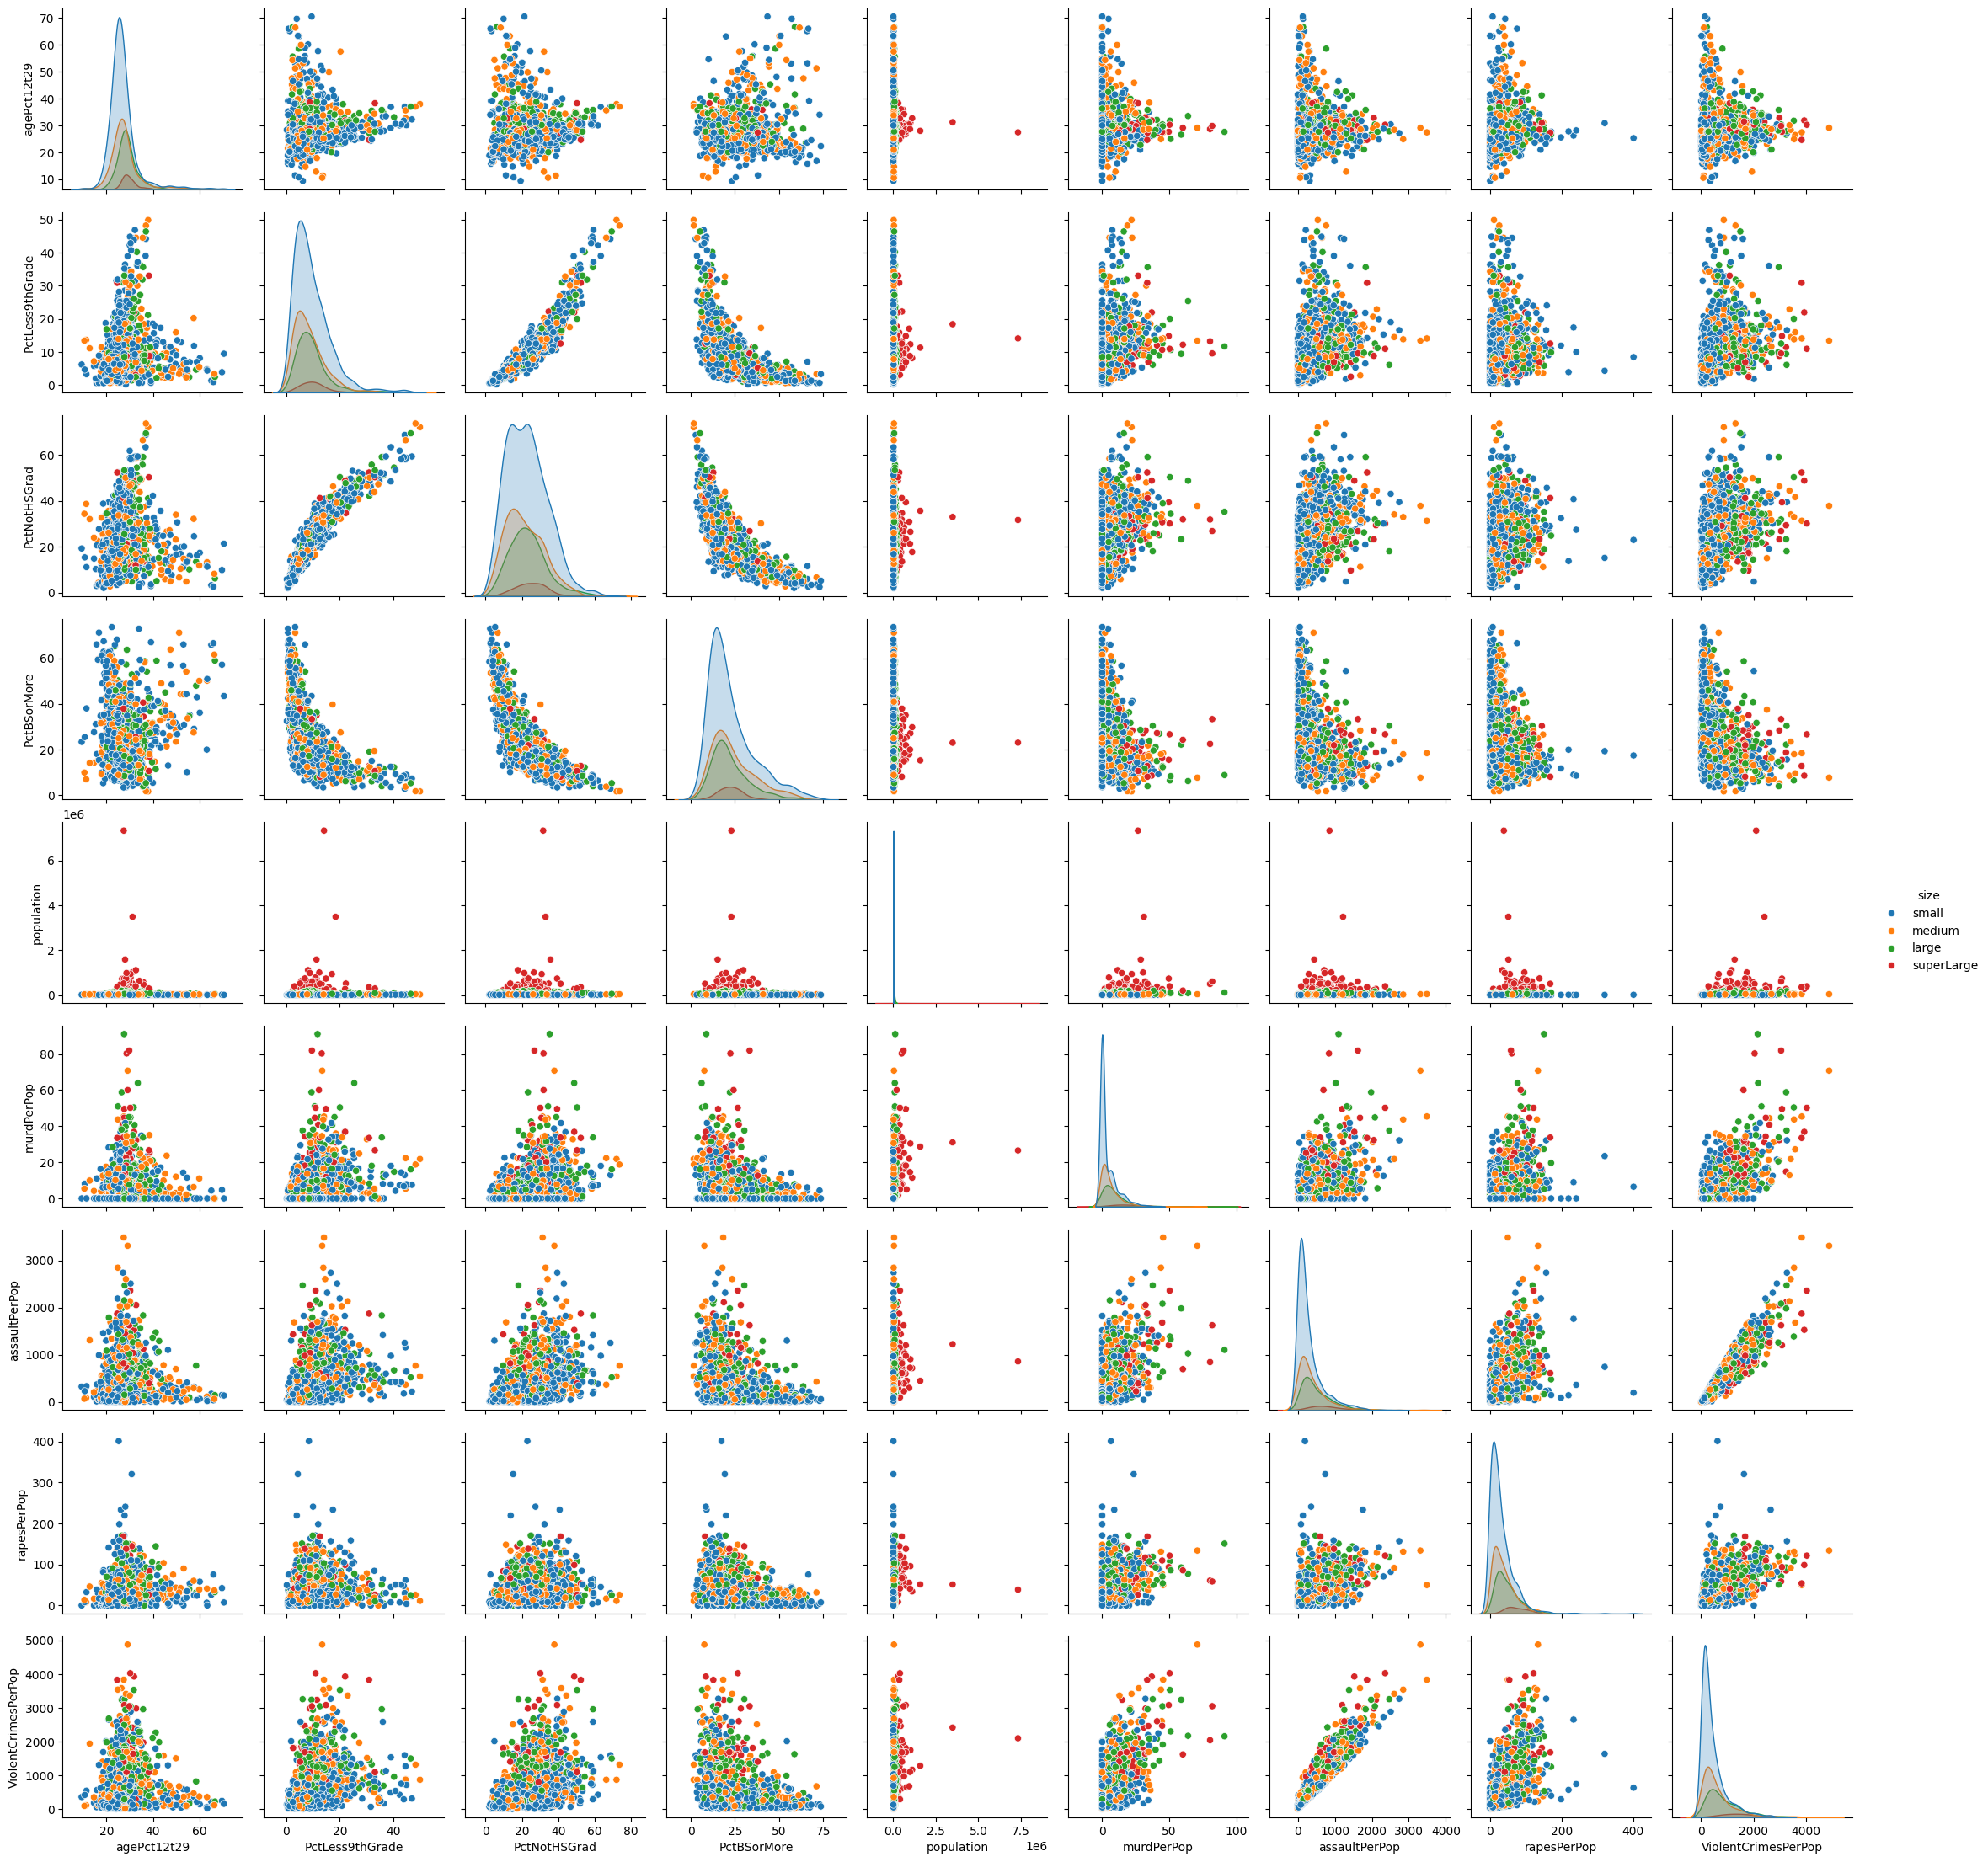

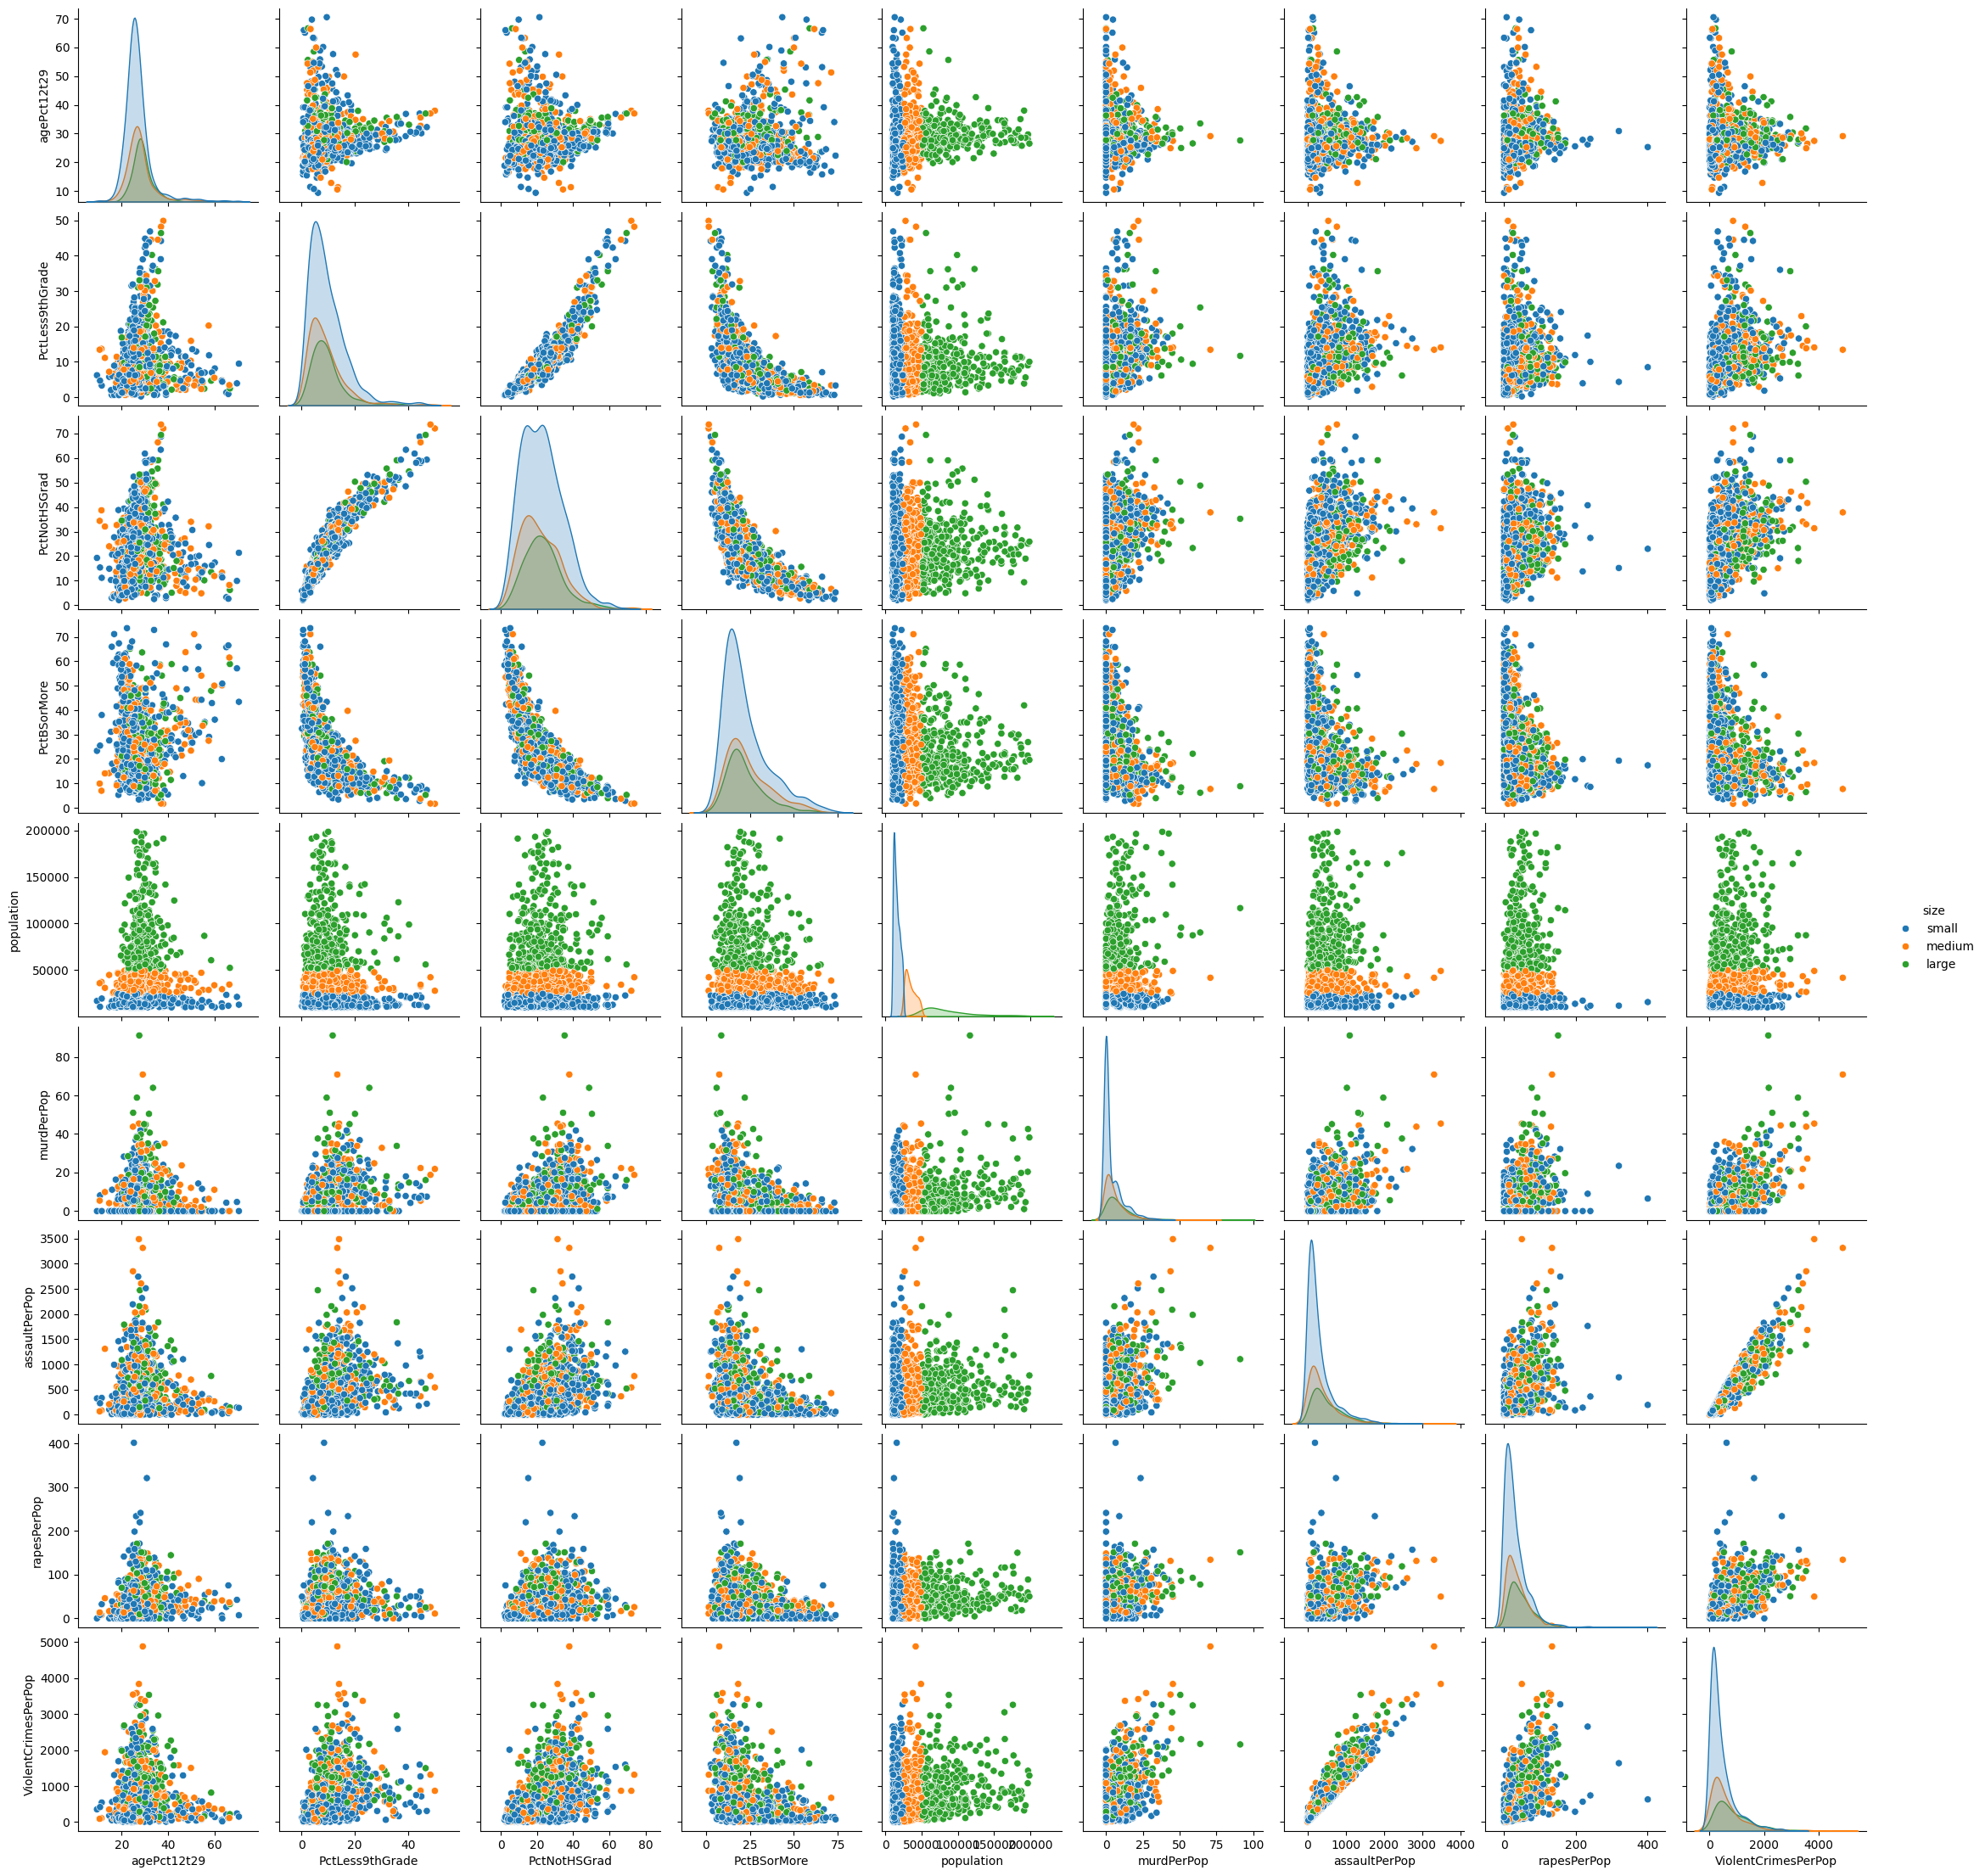

In [1672]:
columns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'murdPerPop',
           'assaultPerPop', 'rapesPerPop','ViolentCrimesPerPop', 'size']
sns.pairplot(crime_in[columns], hue= 'size')

crime_in_less = crime_in[crime_in['population'] < 200000]
sns.pairplot(crime_in_less[columns], hue= 'size')

In [1673]:
# correlation matrix
corrcolumns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'murdPerPop',
           'assaultPerPop', 'rapesPerPop','ViolentCrimesPerPop']

crime_small = crime_in.loc[crime_in['size'] == 'small']
crime_medium = crime_in.loc[crime_in['size'] == 'medium']
crime_large = crime_in.loc[crime_in['size'] == 'large']
crime_superLarge = crime_in.loc[crime_in['size'] == 'superLarge']

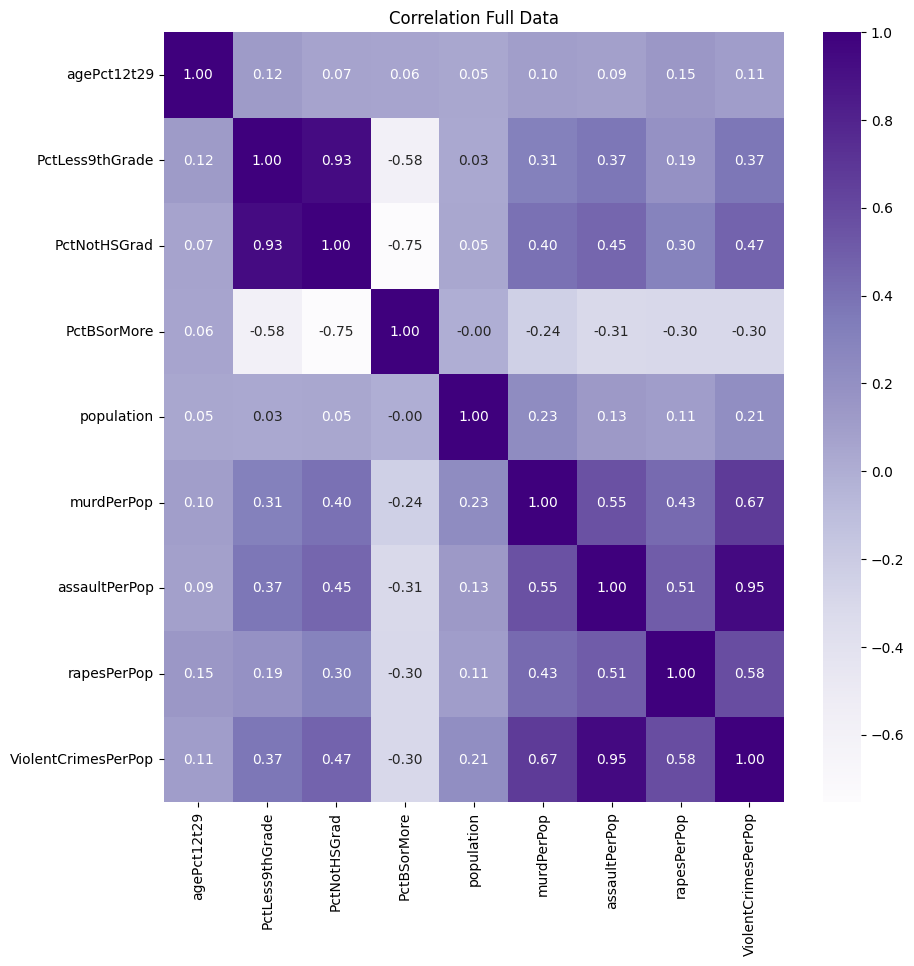

In [1674]:
corr = crime_in[corrcolumns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Purples')
plt.title('Correlation Full Data')
plt.show()

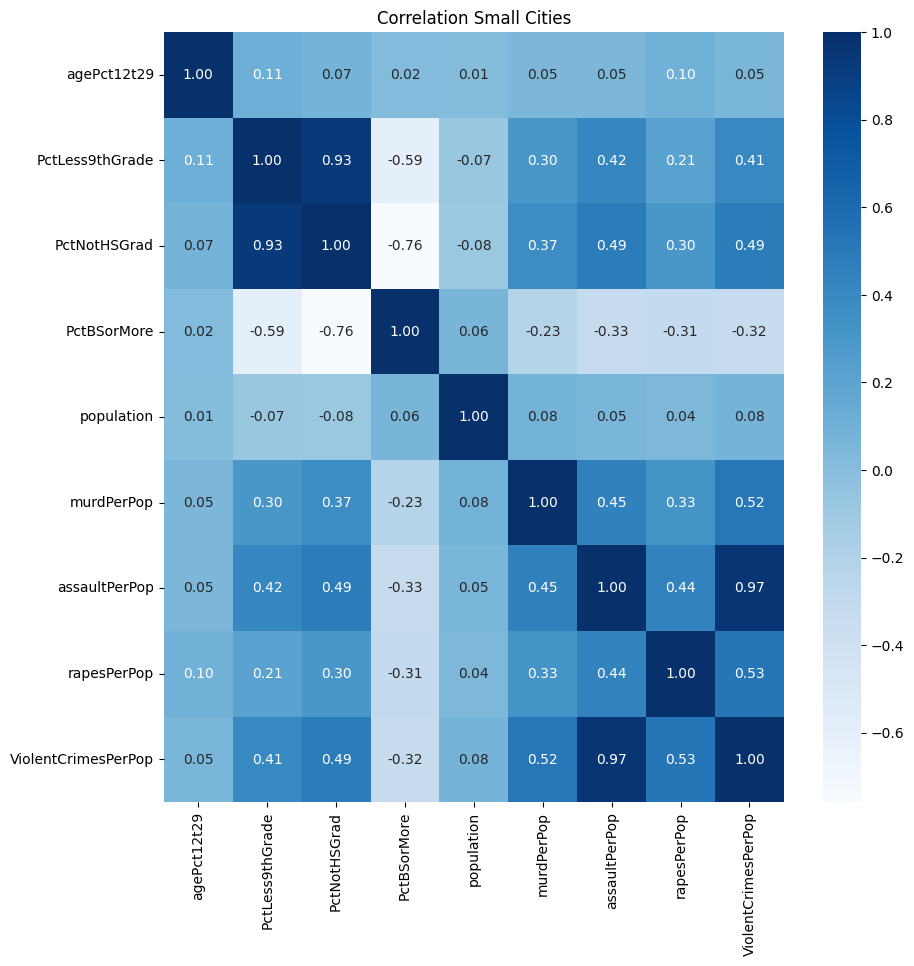

In [1675]:
corr = crime_small[corrcolumns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Small Cities')
plt.show()

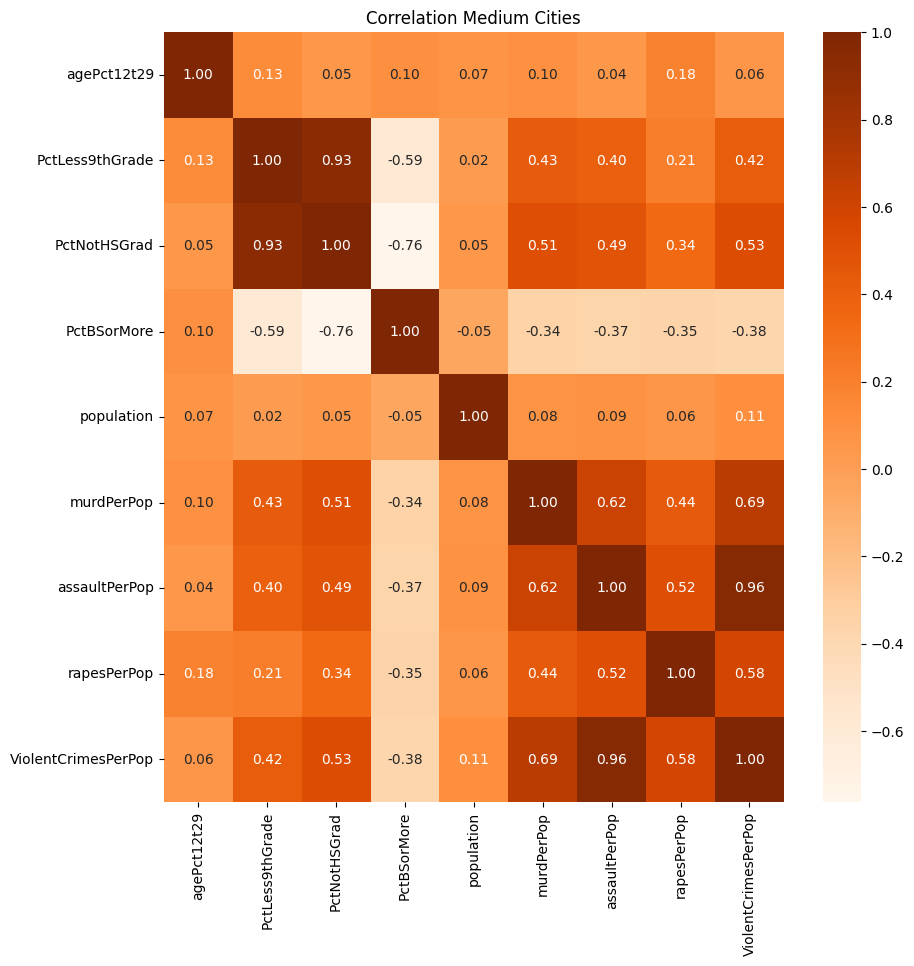

In [1676]:
corr = crime_medium[corrcolumns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Oranges')
plt.title('Correlation Medium Cities')
plt.show()

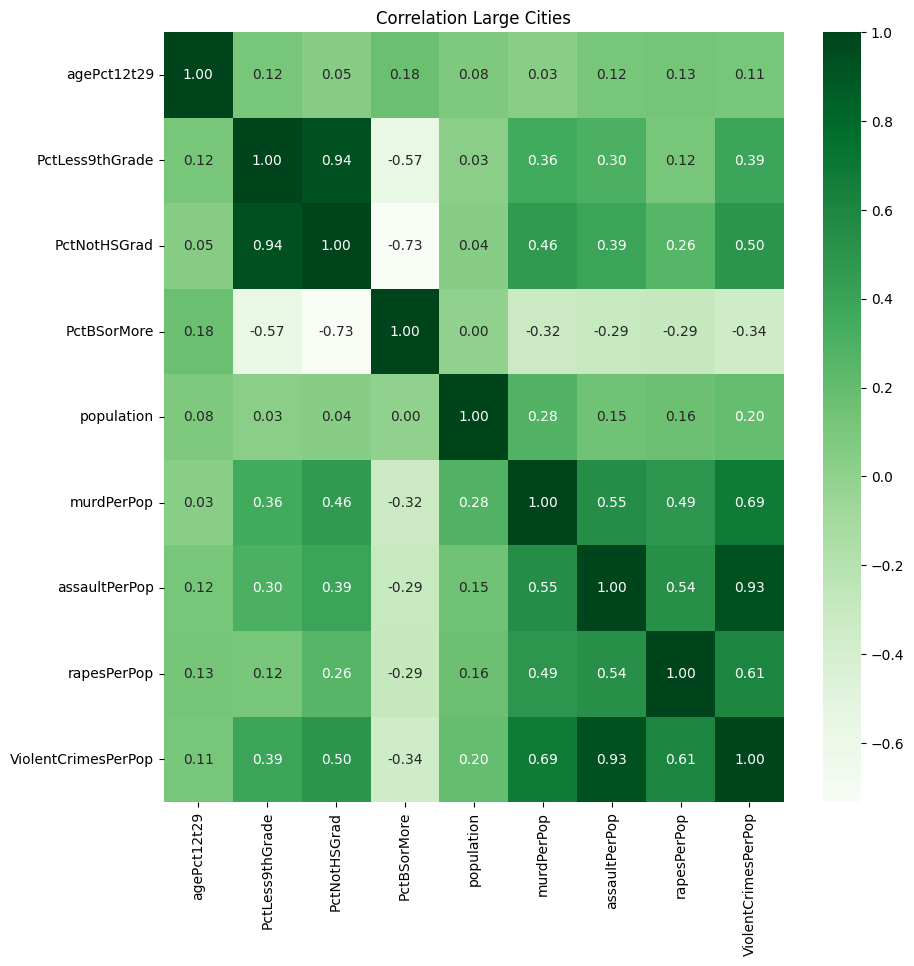

In [1677]:
corr = crime_large[corrcolumns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Greens')
plt.title('Correlation Large Cities')
plt.show()

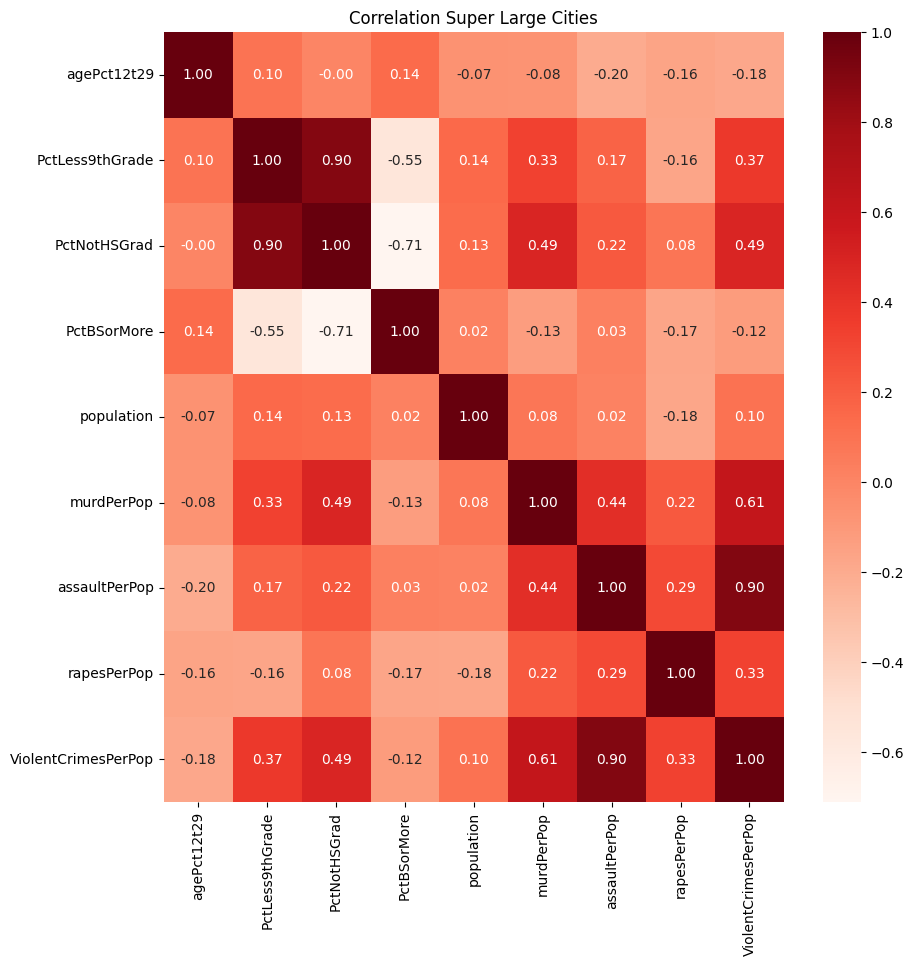

In [1678]:
corr = crime_superLarge[corrcolumns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Reds')
plt.title('Correlation Super Large Cities')
plt.show()

In [1679]:
# columns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'ViolentCrimesPerPop', 'size']
columns = ['PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'ViolentCrimesPerPop', 'size']
crime_clean_set = crime_in[columns]


In [1680]:
crime_clean_set.to_csv('crime_clean_set.csv', index=False)

## FULL DATASET MODELS

In [1681]:
# train/test split
from sklearn.model_selection import train_test_split
X = crime_clean_set.drop(columns=['ViolentCrimesPerPop', 'size'])
y = crime_clean_set['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1595, 4), (399, 4), (1595,), (399,))

### LIN REG FULL DATA

Mean Squared Error: 284003.1529850901
Root Mean Squared Error: 532.9194620063055


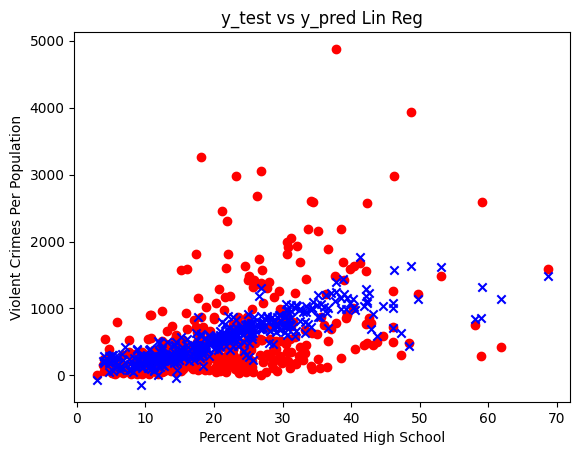

Feature: 0, Score: -65.33651
Feature: 1, Score: 76.01792
Feature: 2, Score: 15.19396
Feature: 3, Score: 0.00045


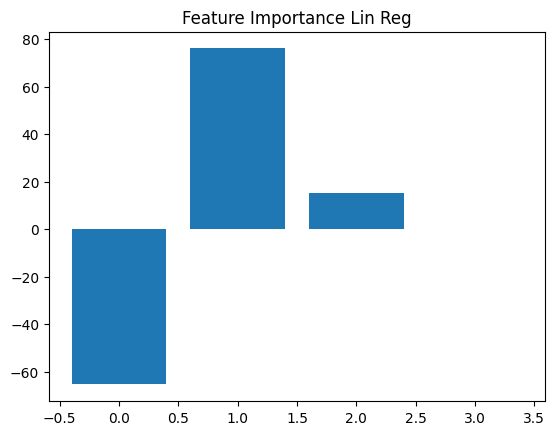

In [1682]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# # show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_pred.shape
plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Lin Reg')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

plt.show()

# feature importance
importance = reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance Lin Reg')
plt.show()

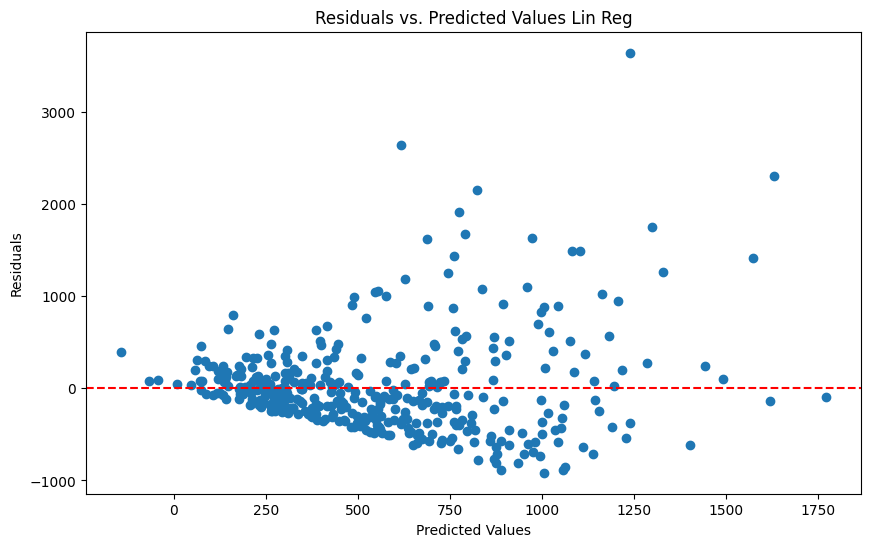

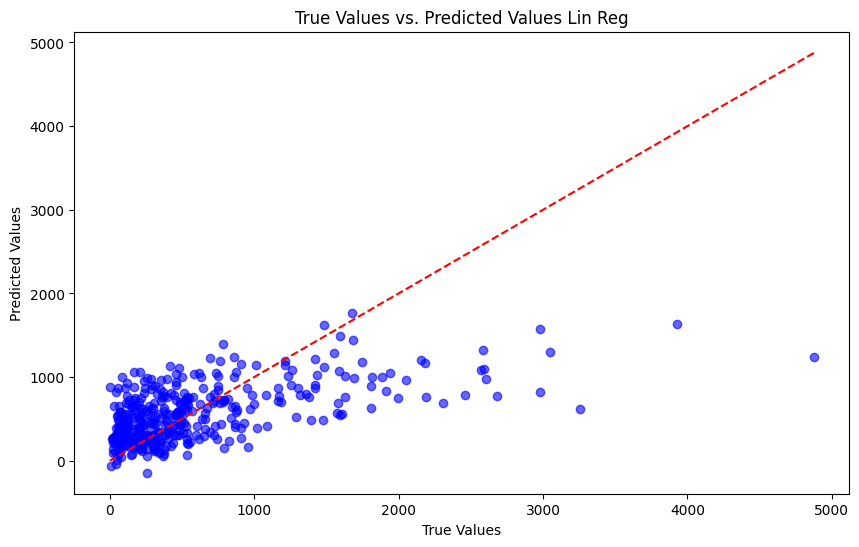

In [1683]:
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Lin Reg')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('True Values vs. Predicted Values Lin Reg')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### RANDOM FOREST FULL DATA

Mean Squared Error: 247022.14565070526
Root Mean Squared Error: 497.0132248247578


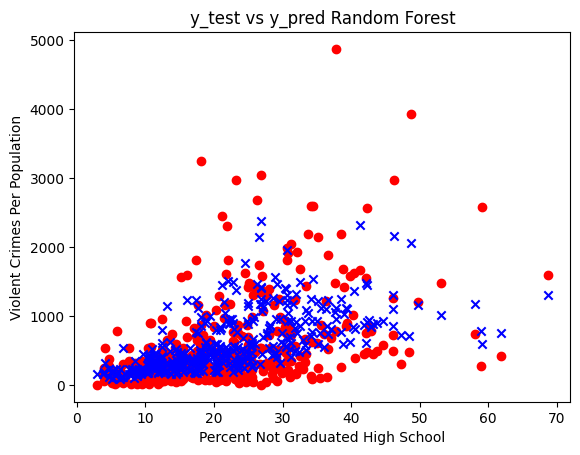

Feature: 0, Score: 0.15247
Feature: 1, Score: 0.36874
Feature: 2, Score: 0.15488
Feature: 3, Score: 0.32390


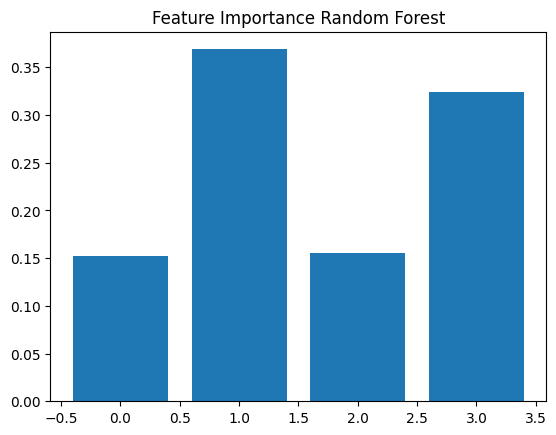

In [1684]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
rf = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf.predict(X_test)

# show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Random Forest')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

# feature importance for random forest
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance Random Forest')
plt.show()

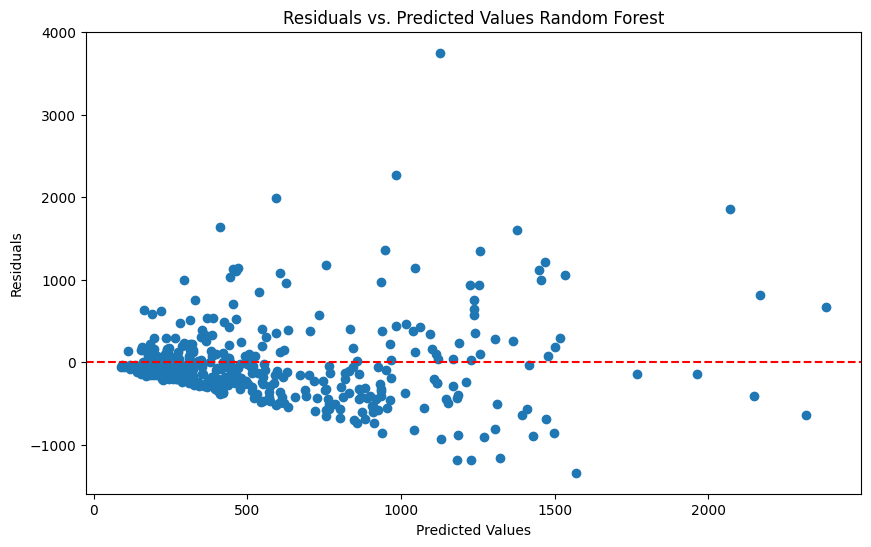

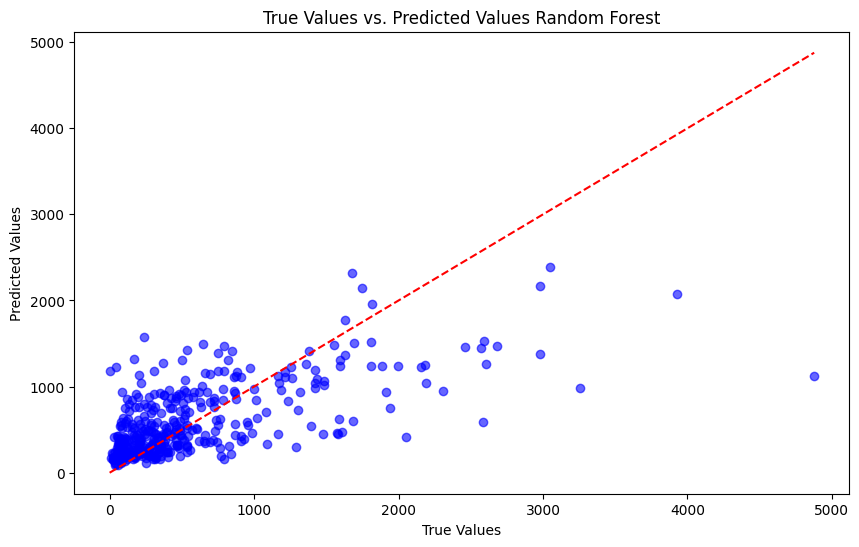

In [1685]:
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.title('True Values vs. Predicted Values Random Forest')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### DECISION TREE FULL DATA

Mean Squared Error: 413357.9101223057
Root Mean Squared Error: 642.9291641559789


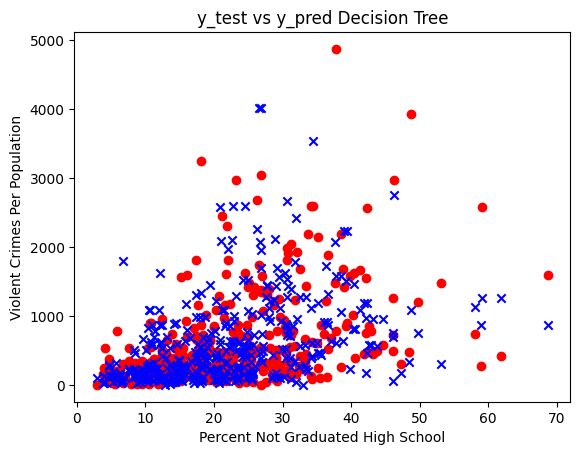

Feature: 0, Score: 0.18179
Feature: 1, Score: 0.35960
Feature: 2, Score: 0.15728
Feature: 3, Score: 0.30133


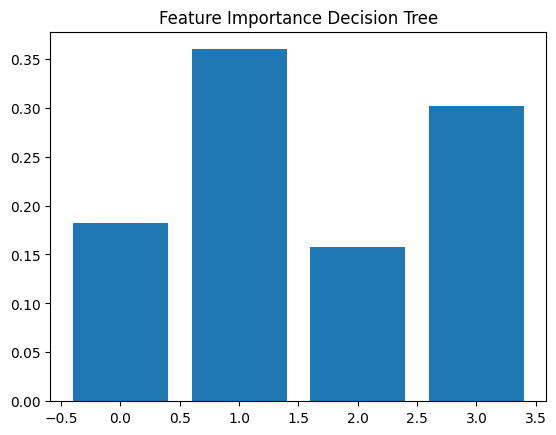

In [1686]:
# deciesion tree regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
dt = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dt.predict(X_test)

# show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Decision Tree')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

plt.show()

# feature importance for decision tree
importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title('Feature Importance Decision Tree')
plt.show()

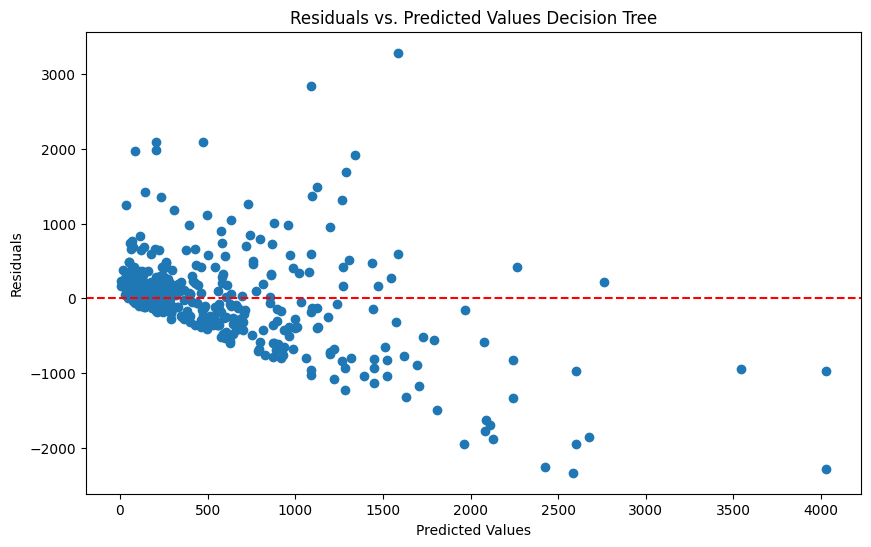

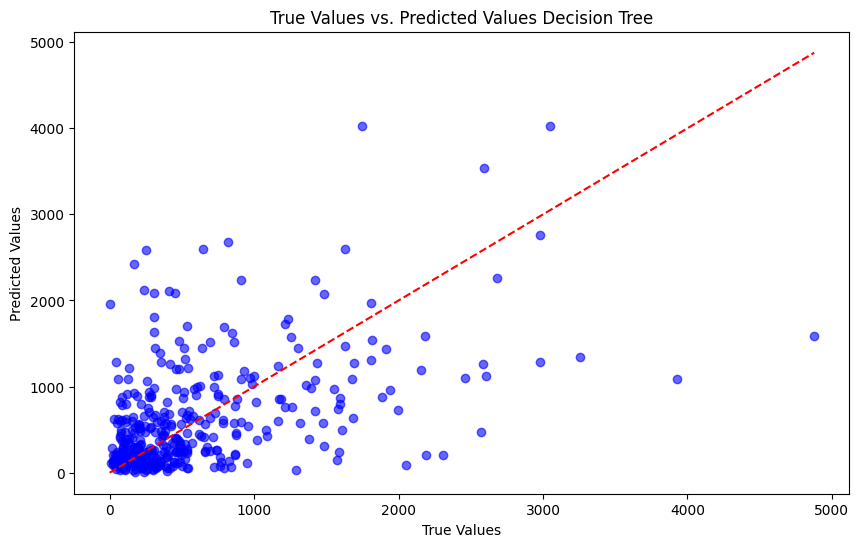

In [1687]:
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Decision Tree')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.title('True Values vs. Predicted Values Decision Tree')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

## MEDIUM CITIES MODELS

In [1688]:
# same for medium cities
# train/test split
from sklearn.model_selection import train_test_split
crime_clean_med = crime_clean_set.loc[crime_clean_set['size'] == 'medium']
X = crime_clean_med.drop(columns=['ViolentCrimesPerPop', 'size'])
y = crime_clean_med['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((414, 4), (74, 4), (414,), (74,))

### LIN REG MED

Mean Squared Error: 209482.42539085253
Root Mean Squared Error: 457.6925009117503


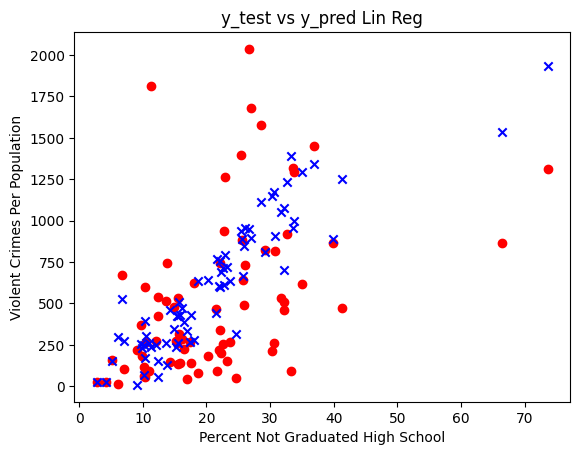

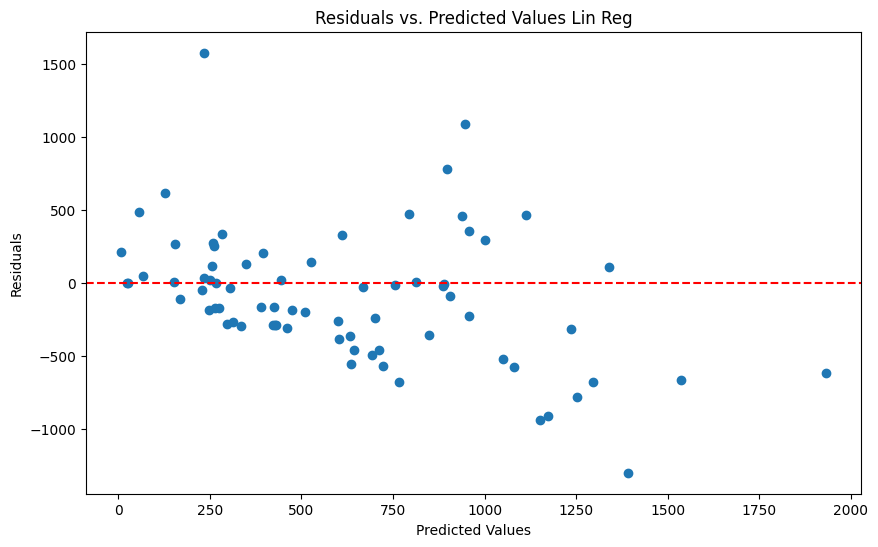

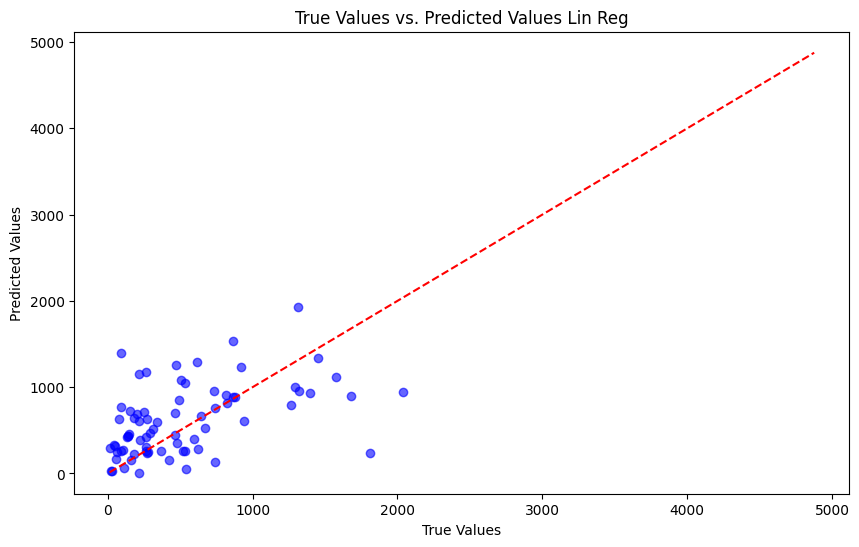

In [1689]:
# linear regression MEDIUM CITIES
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# # show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_pred.shape
plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Lin Reg')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Lin Reg')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('True Values vs. Predicted Values Lin Reg')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### RANDOM FOREST MEDIUM

Mean Squared Error: 227397.3728015129
Root Mean Squared Error: 476.8620060368753


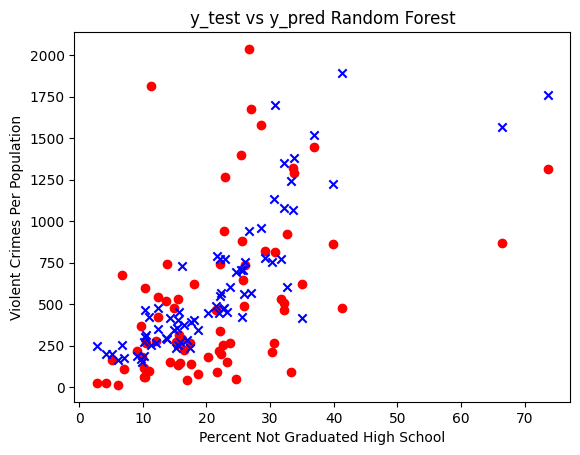

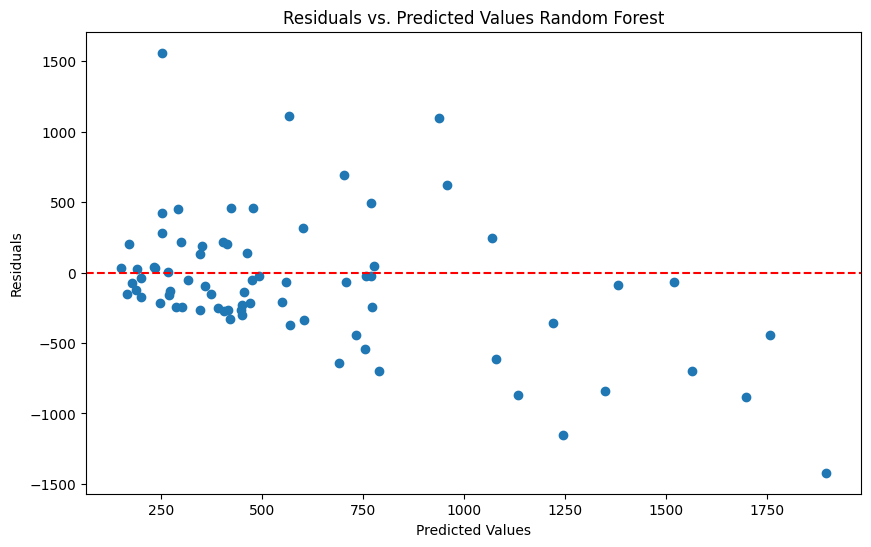

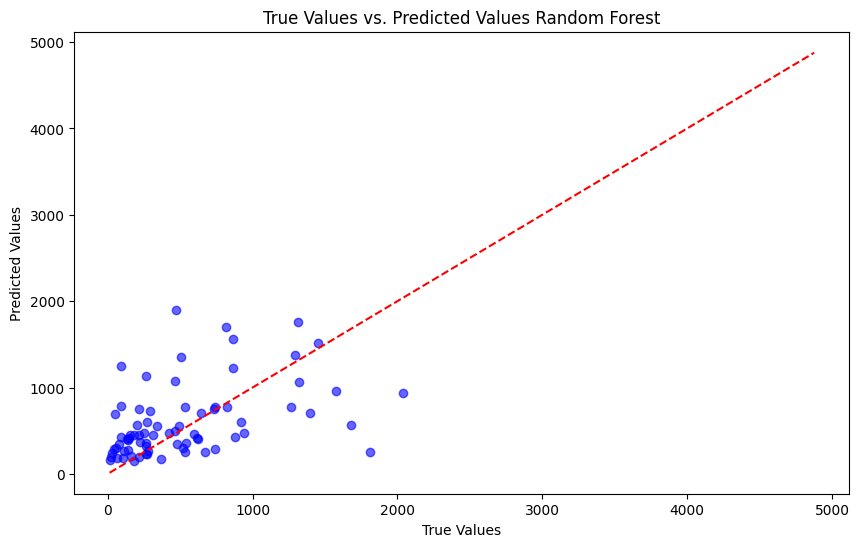

In [1690]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
rf = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf.predict(X_test)

# show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Random Forest')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.title('True Values vs. Predicted Values Random Forest')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### DECISION TREE MEDIUM

Mean Squared Error: 261445.9501851351
Root Mean Squared Error: 511.3178563135998


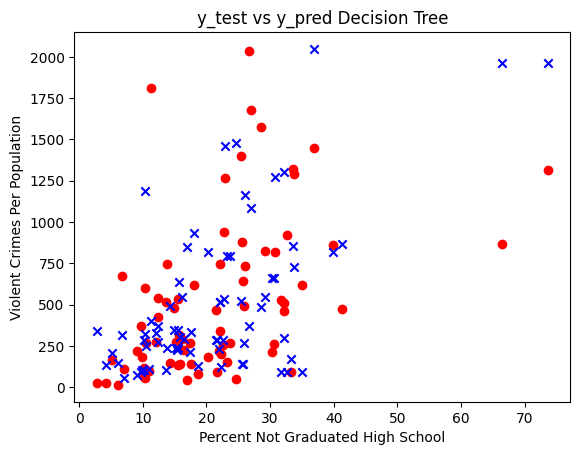

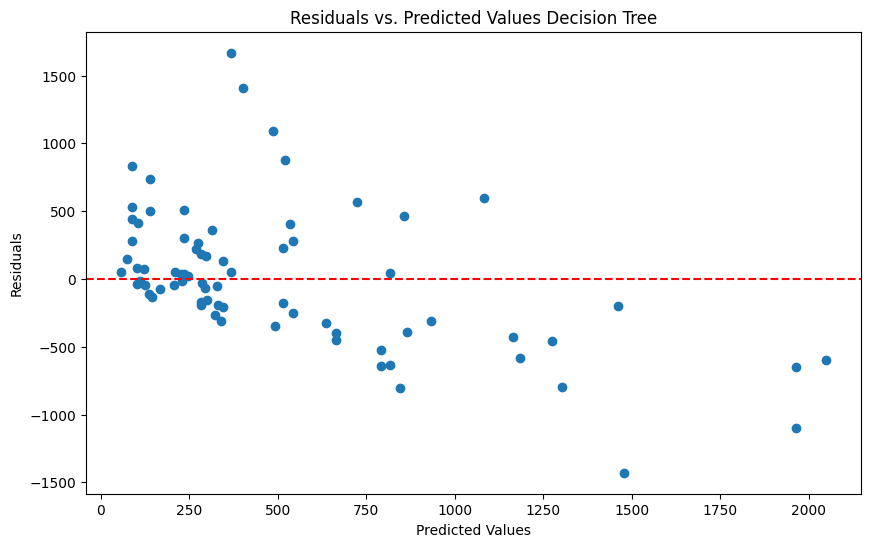

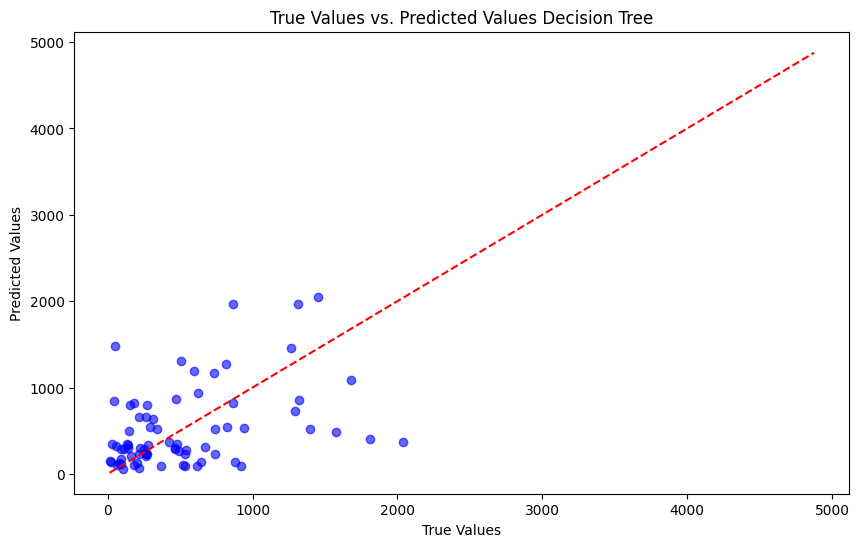

In [1691]:
# decision tree regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
dt = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dt.predict(X_test)

# show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Decision Tree')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Decision Tree')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.title('True Values vs. Predicted Values Decision Tree')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

## SMALL CITIES MODELS

In [1692]:
# same for small cities
# train/test split
from sklearn.model_selection import train_test_split
crime_clean_small = crime_clean_set.loc[crime_clean_set['size'] == 'small']
X = crime_clean_small.drop(columns=['ViolentCrimesPerPop', 'size'])
y = crime_clean_small['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((926, 4), (164, 4), (926,), (164,))

### LIN REG SMALL CITIES

Mean Squared Error: 178062.61391364734
Root Mean Squared Error: 421.9746602743432


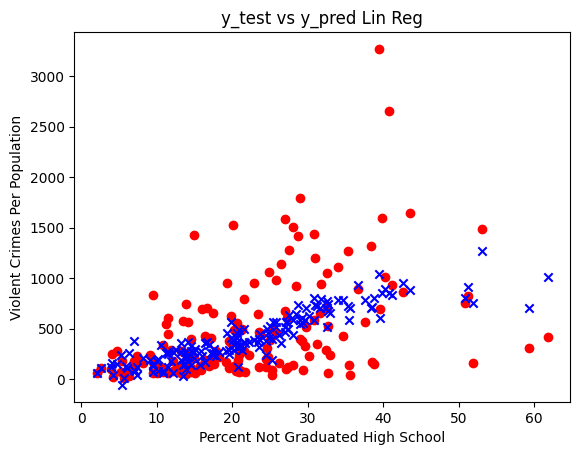

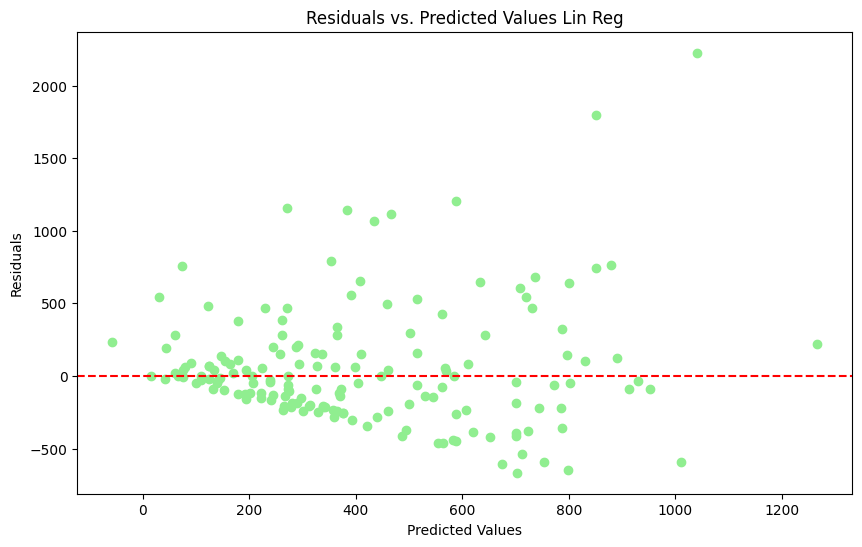

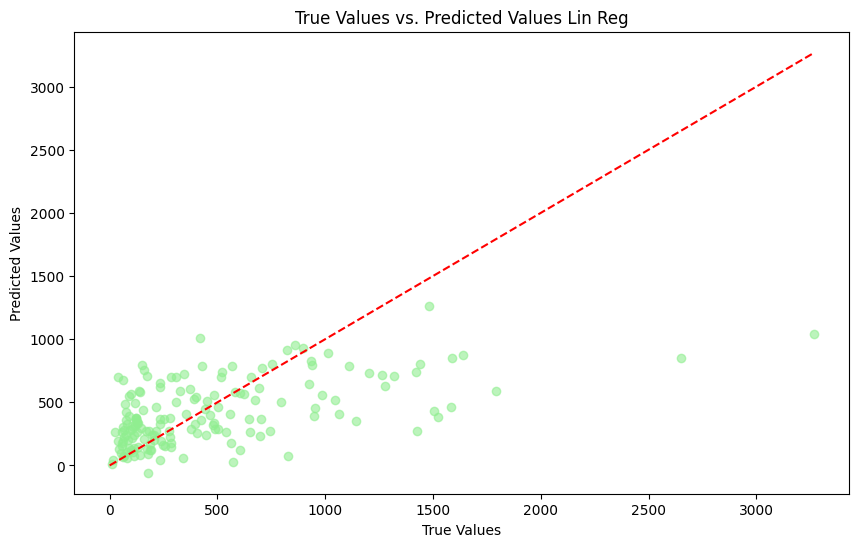

In [1693]:
# linear regression SMALL CITIES
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# # show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_pred.shape
plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Lin Reg')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='lightgreen')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Lin Reg')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='lightgreen')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('True Values vs. Predicted Values Lin Reg')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### RANDOM FOREST SMALL CITIES

Mean Squared Error: 191976.22335306945
Root Mean Squared Error: 438.1509139018992


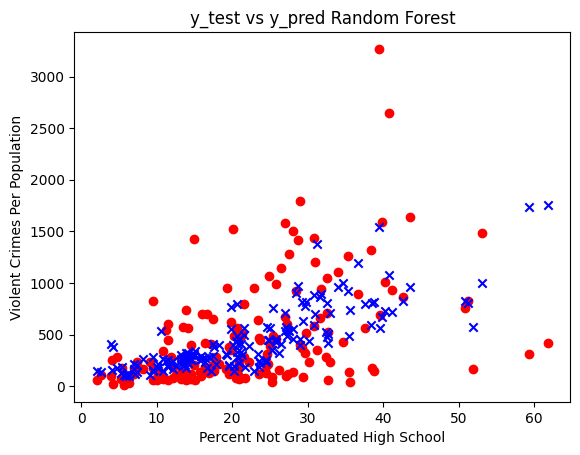

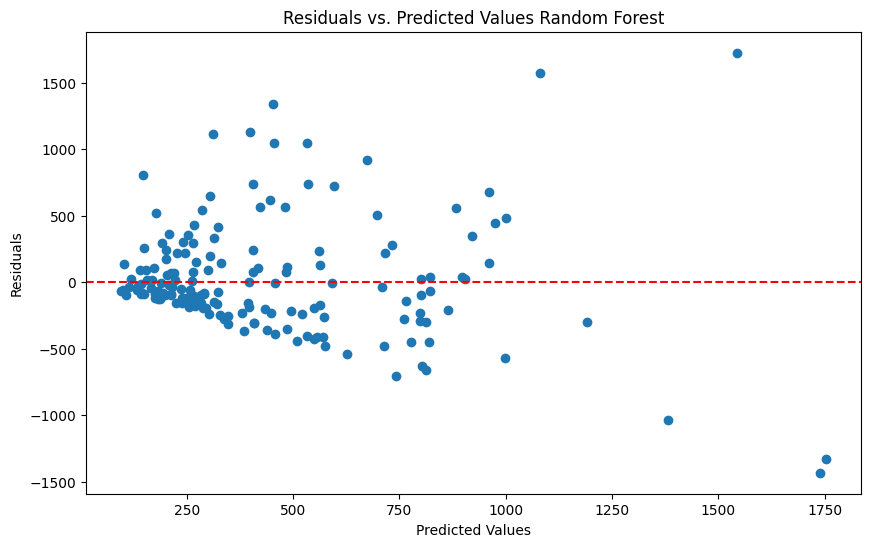

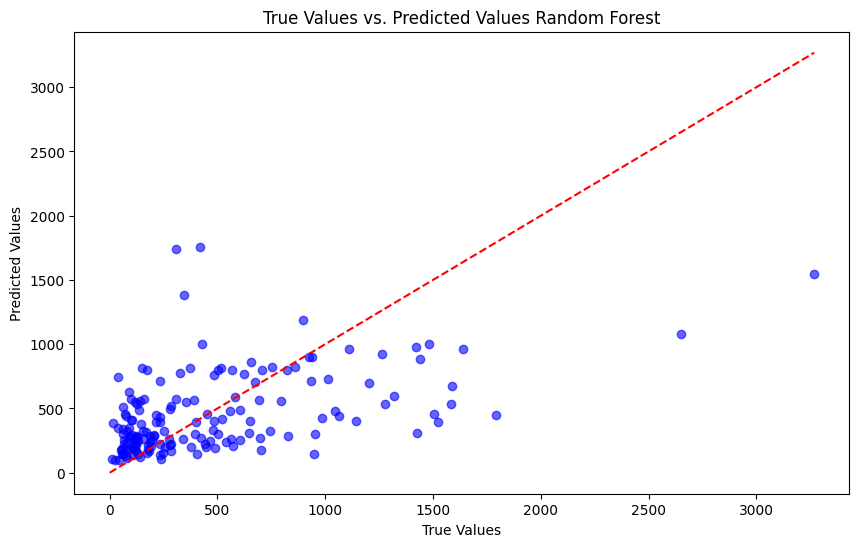

In [1694]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
rf = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf.predict(X_test)

# show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Random Forest')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.title('True Values vs. Predicted Values Random Forest')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### DECISION TREE SMALL CITIES

Mean Squared Error: 454299.1604128049
Root Mean Squared Error: 674.0171810961534


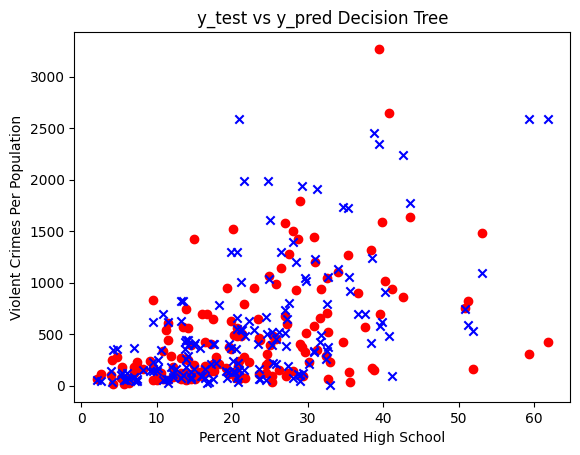

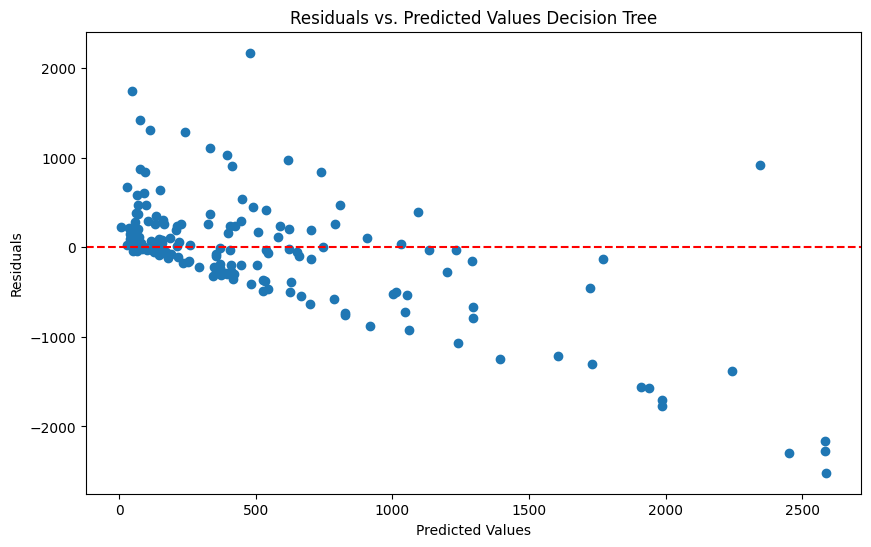

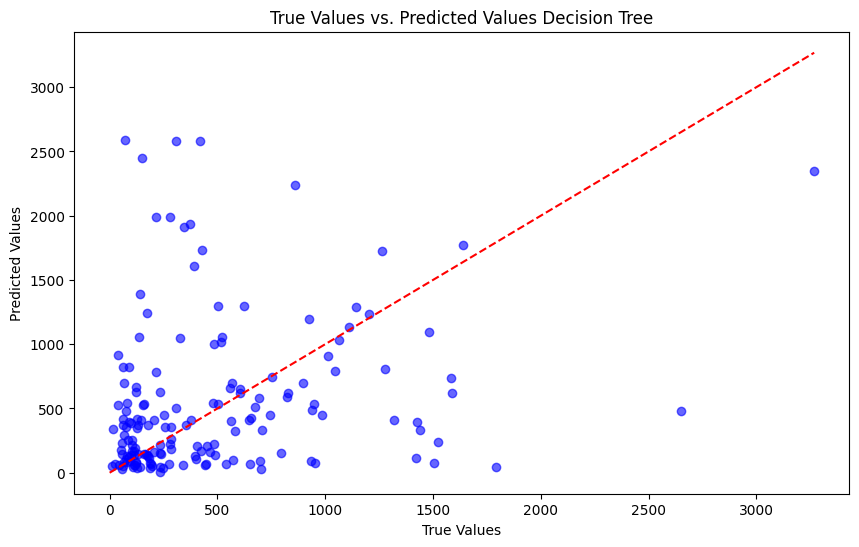

In [1695]:
# decision tree regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
dt = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dt.predict(X_test)

# show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Decision Tree')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Decision Tree')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.title('True Values vs. Predicted Values Decision Tree')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

## LARGE CITY MODELS

In [1696]:
# same for Large cities
# train/test split
from sklearn.model_selection import train_test_split
crime_clean_large = crime_clean_set.loc[crime_clean_set['size'] == 'large']
X = crime_clean_large.drop(columns=['ViolentCrimesPerPop', 'size'])
y = crime_clean_large['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((298, 4), (53, 4), (298,), (53,))

### LIN REG LARGE

Mean Squared Error: 285605.07822979696
Root Mean Squared Error: 534.4203198137183


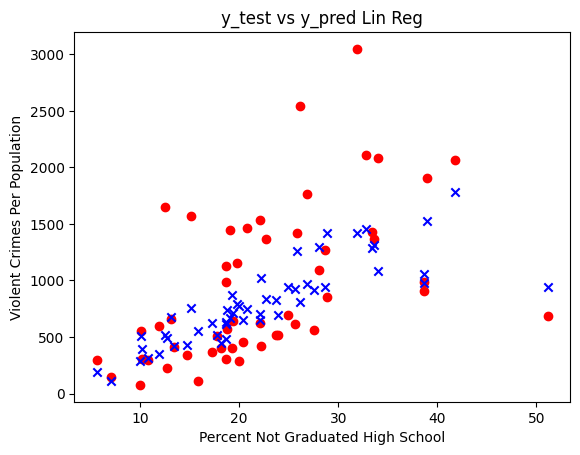

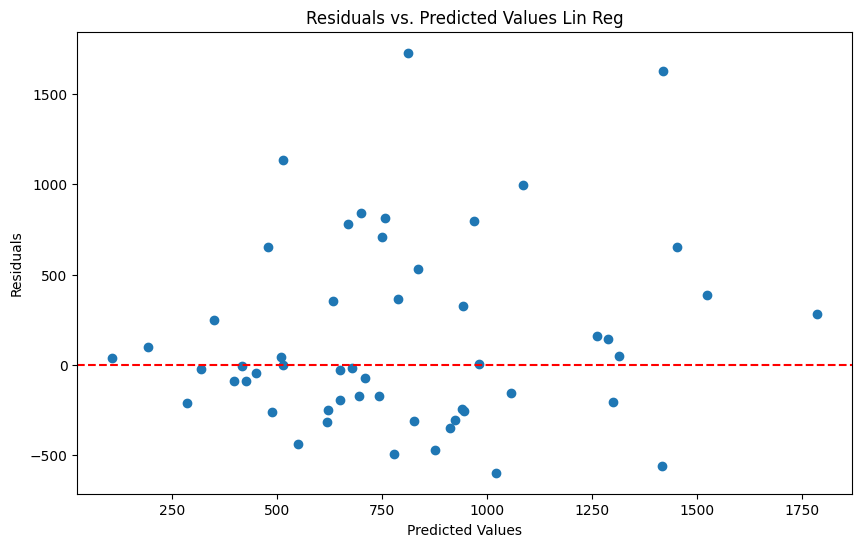

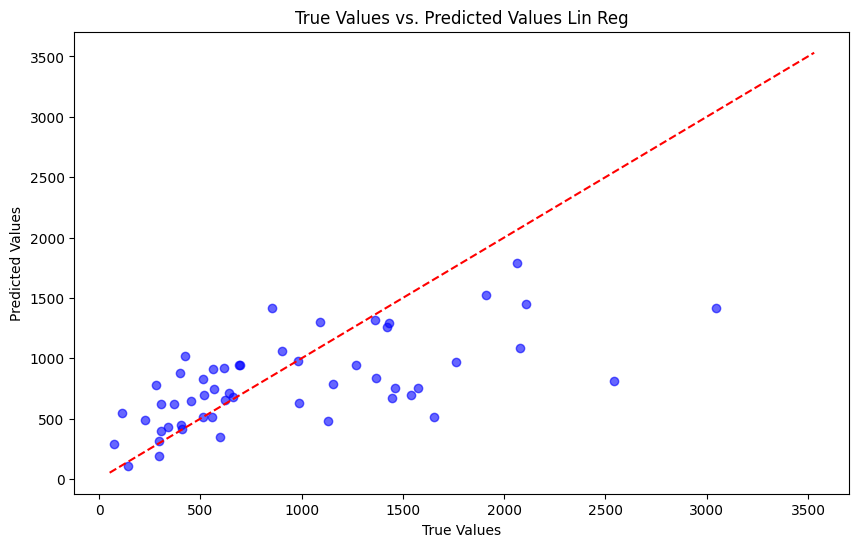

In [1697]:
# linear regression MEDIUM CITIES
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# # show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_pred.shape
plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Lin Reg')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Lin Reg')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('True Values vs. Predicted Values Lin Reg')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### RANDOM FOREST LARGE

Mean Squared Error: 332130.61178744055
Root Mean Squared Error: 576.3077405236204


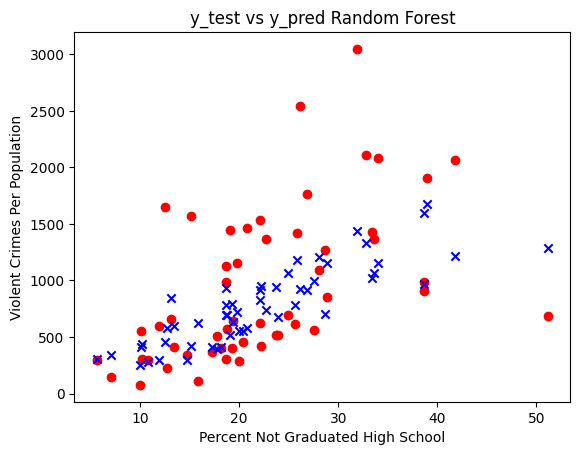

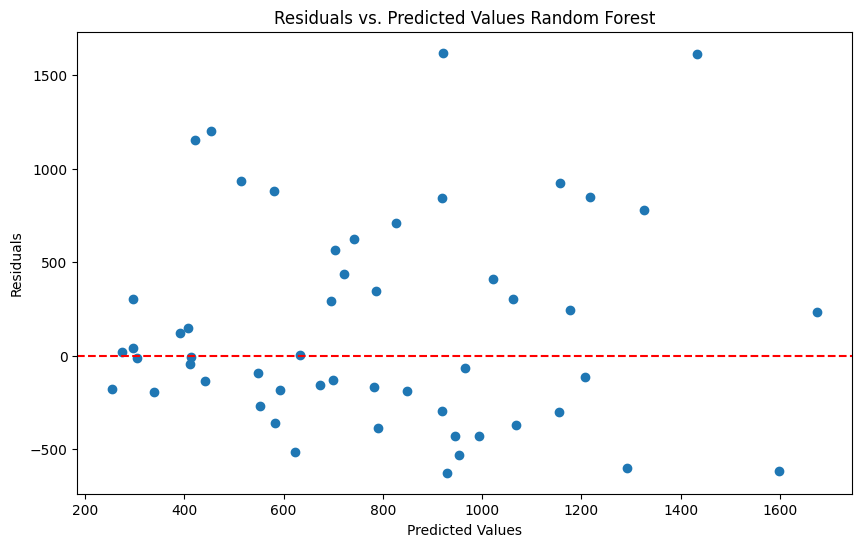

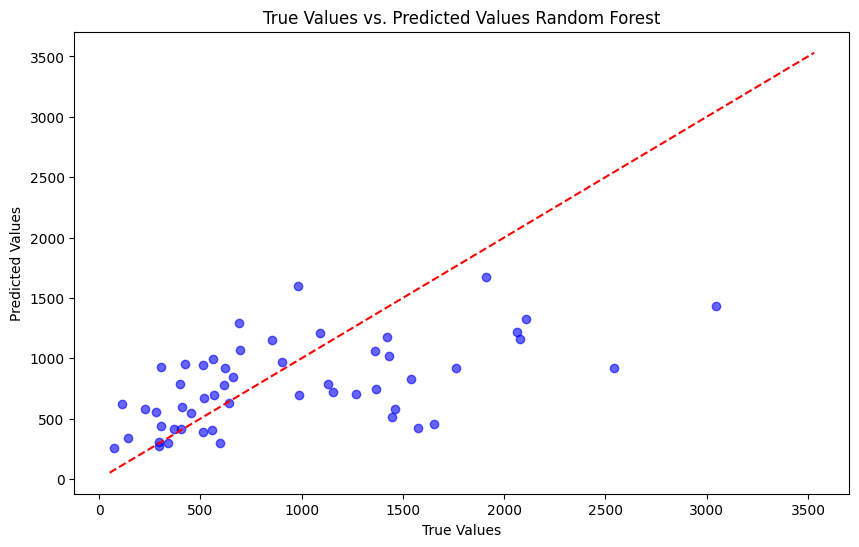

In [1698]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
rf = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf.predict(X_test)

# show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Random Forest')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.title('True Values vs. Predicted Values Random Forest')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### DECISION TREES LARGE

Mean Squared Error: 659985.7495566037
Root Mean Squared Error: 812.3950698746293


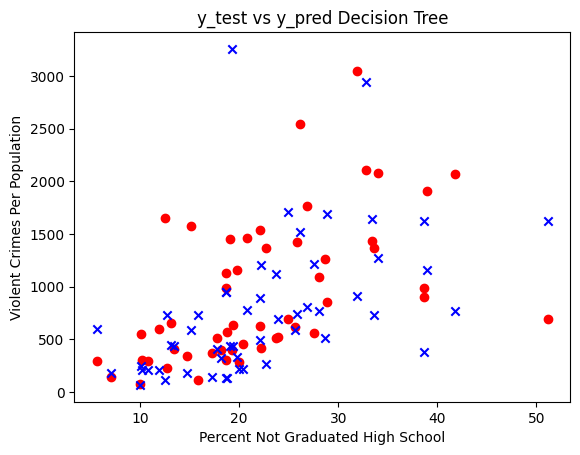

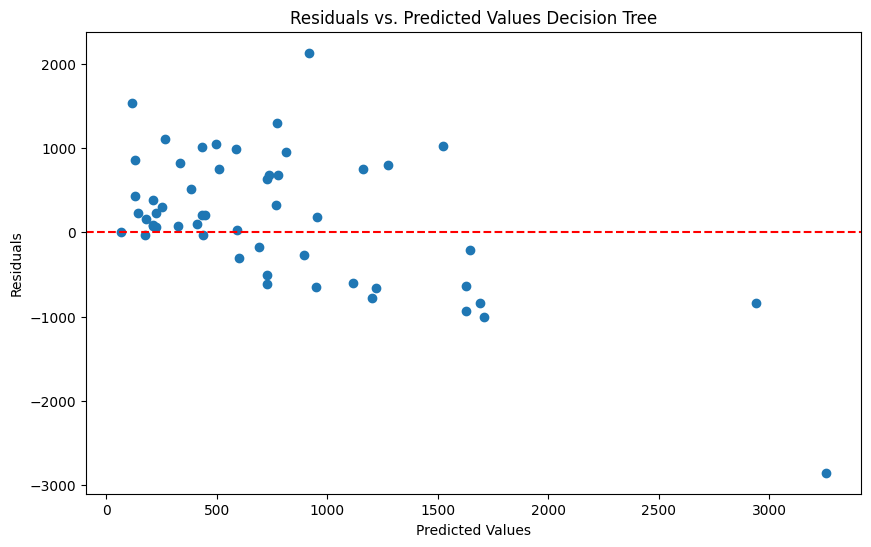

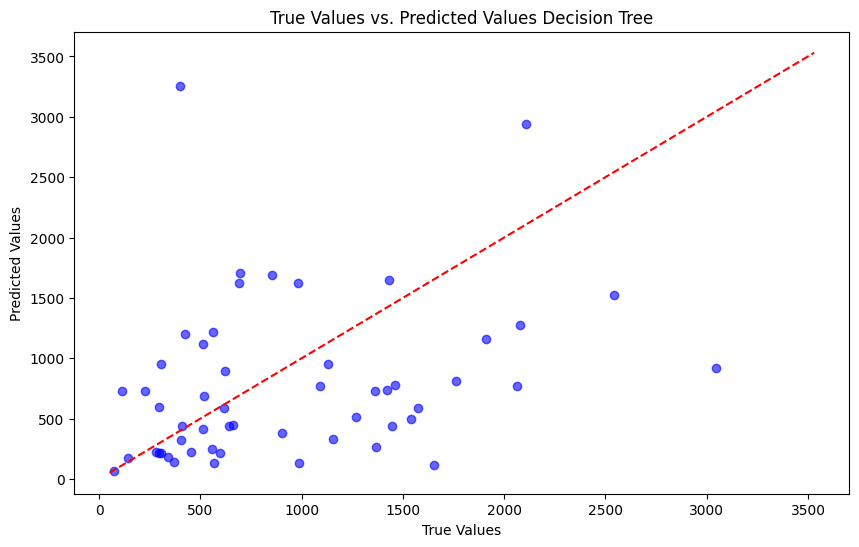

In [1699]:
# decision tree regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
dt = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dt.predict(X_test)

# show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Decision Tree')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Decision Tree')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.title('True Values vs. Predicted Values Decision Tree')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

## SUPER LARGE MODELS

In [1700]:
# same for Super Large cities
# train/test split
from sklearn.model_selection import train_test_split
crime_clean_large = crime_clean_set.loc[crime_clean_set['size'] == 'superLarge']
X = crime_clean_large.drop(columns=['ViolentCrimesPerPop', 'size'])
y = crime_clean_large['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55, 4), (10, 4), (55,), (10,))

### LINREG SUPER

Mean Squared Error: 758961.6561036289
Root Mean Squared Error: 871.1840540916878


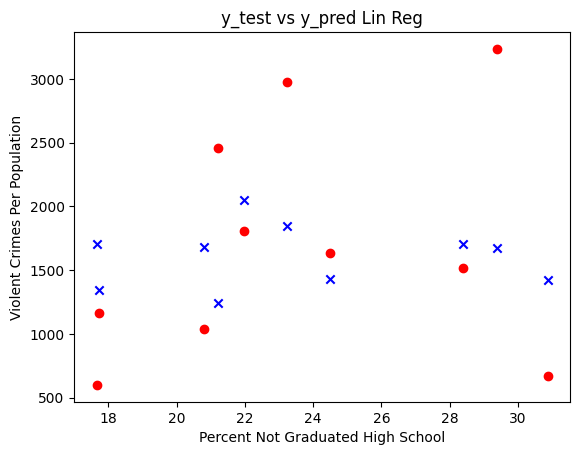

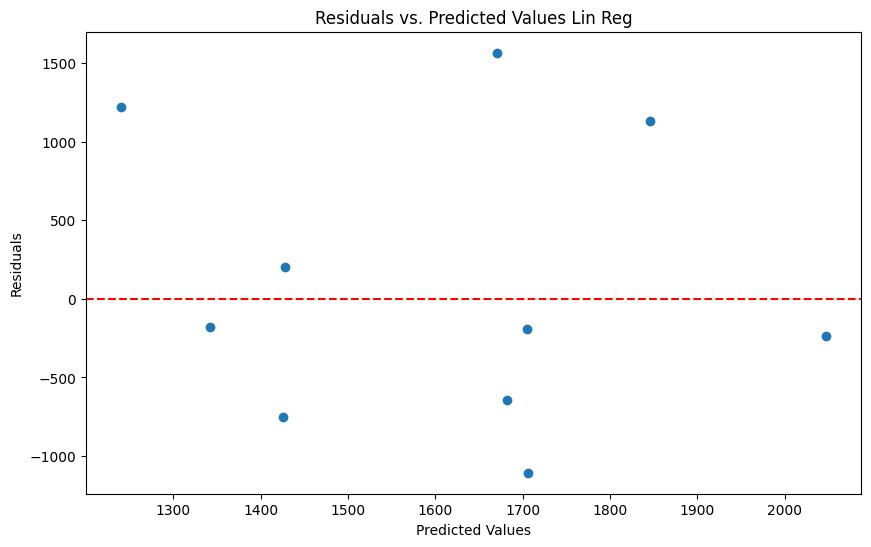

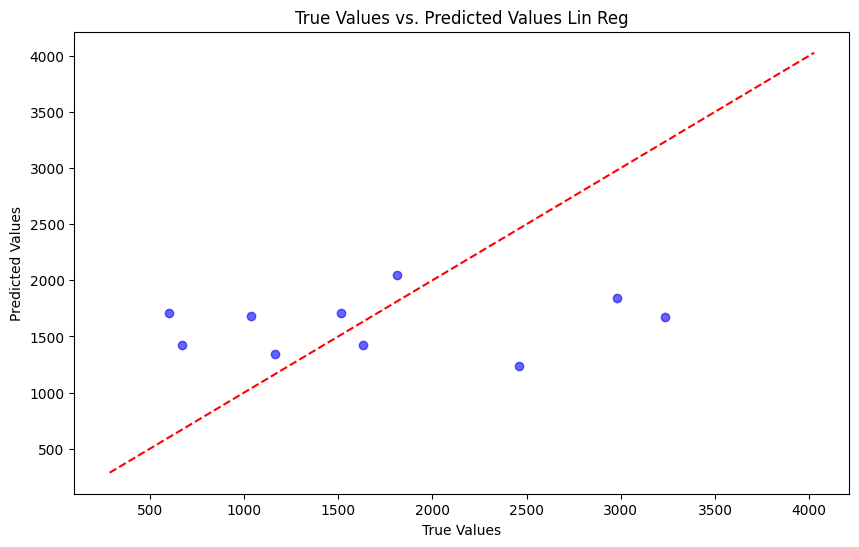

In [1701]:
# linear regression MEDIUM CITIES
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# # show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_pred.shape
plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Lin Reg')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()git s

plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Lin Reg')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('True Values vs. Predicted Values Lin Reg')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### RANDOM FOREST SUPER

Mean Squared Error: 919609.7113186435
Root Mean Squared Error: 958.9628310412471


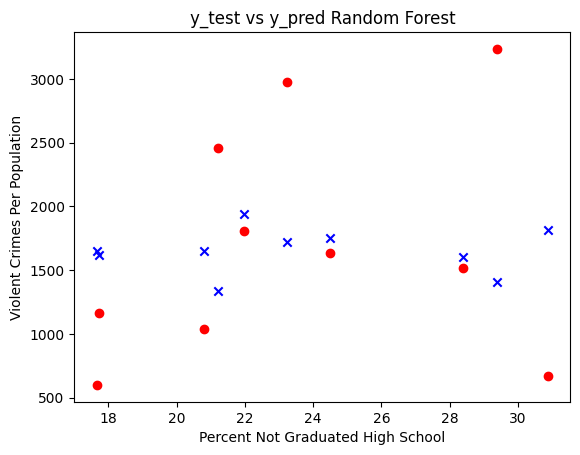

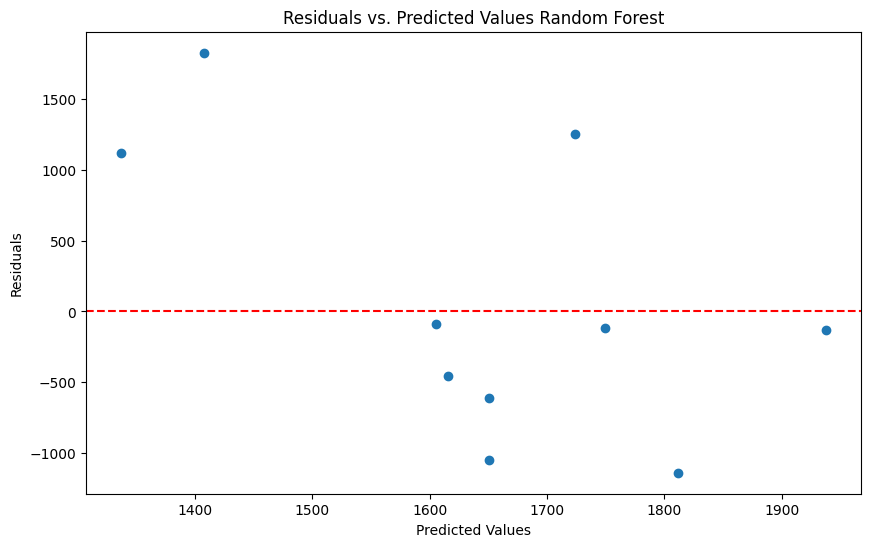

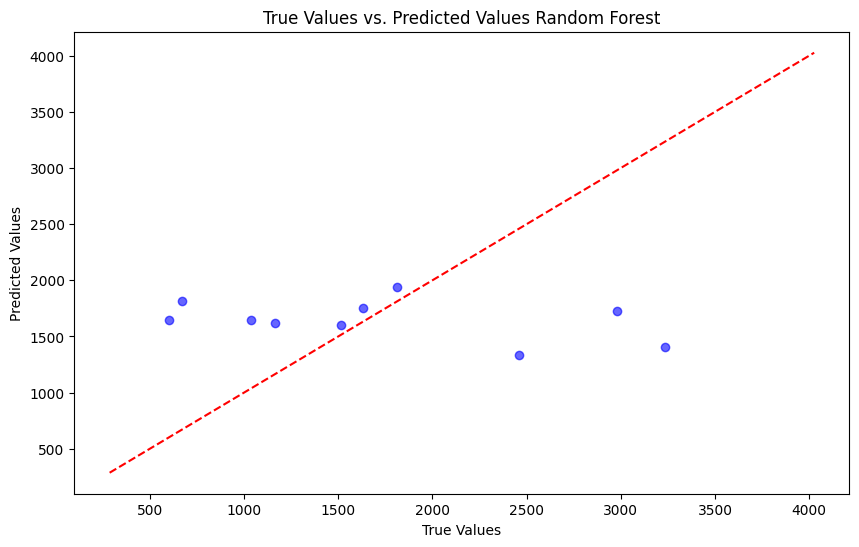

In [1702]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
rf = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf.predict(X_test)

# show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Random Forest')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.title('True Values vs. Predicted Values Random Forest')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### DECISION TREE SUPER

Mean Squared Error: 1123930.34252
Root Mean Squared Error: 1060.1558104920239


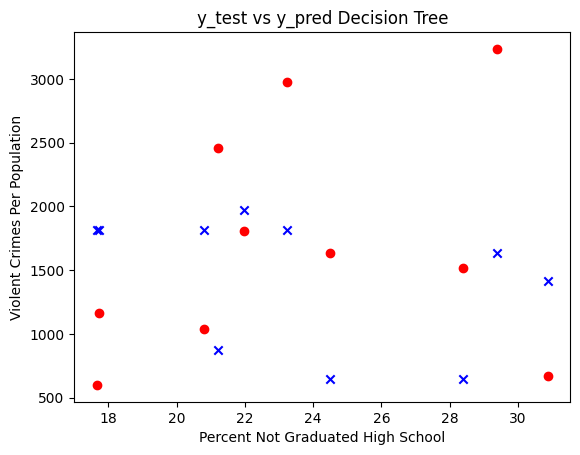

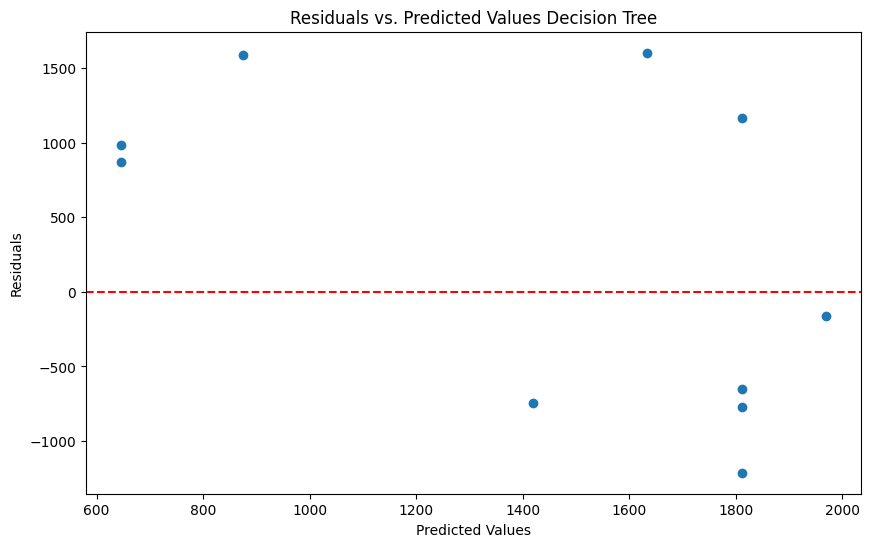

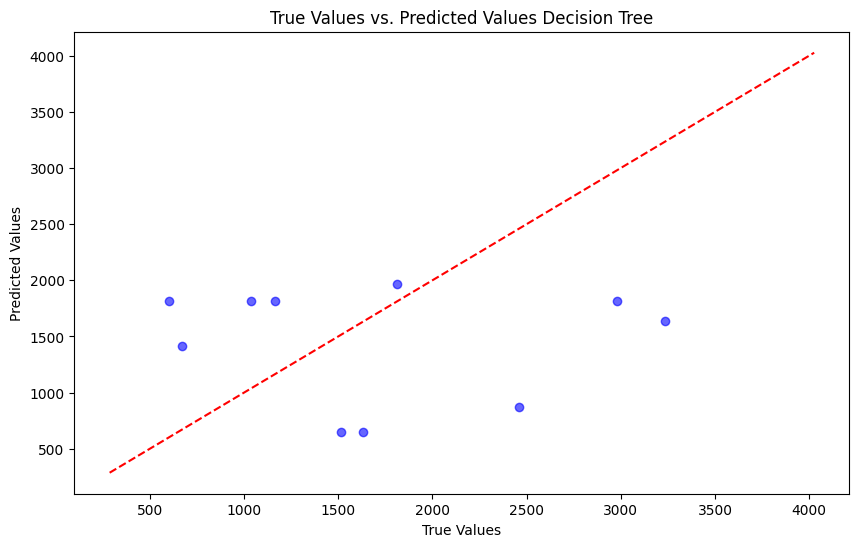

In [1703]:
# decision tree regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
dt = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dt.predict(X_test)

# show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Decision Tree')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Decision Tree')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.title('True Values vs. Predicted Values Decision Tree')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [1704]:
# same for Large cities
# train/test split
from sklearn.model_selection import train_test_split
crime_clean_large = crime_clean_set.loc[crime_clean_set['size'] == 'large']
X = crime_clean_large.drop(columns=['population', 'ViolentCrimesPerPop', 'size'])
y = crime_clean_large['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((298, 3), (53, 3), (298,), (53,))

Mean Squared Error: 160735.81610893892
Root Mean Squared Error: 400.91871508940426


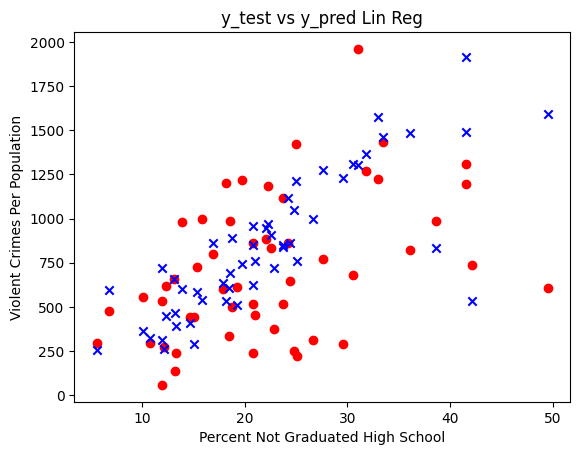

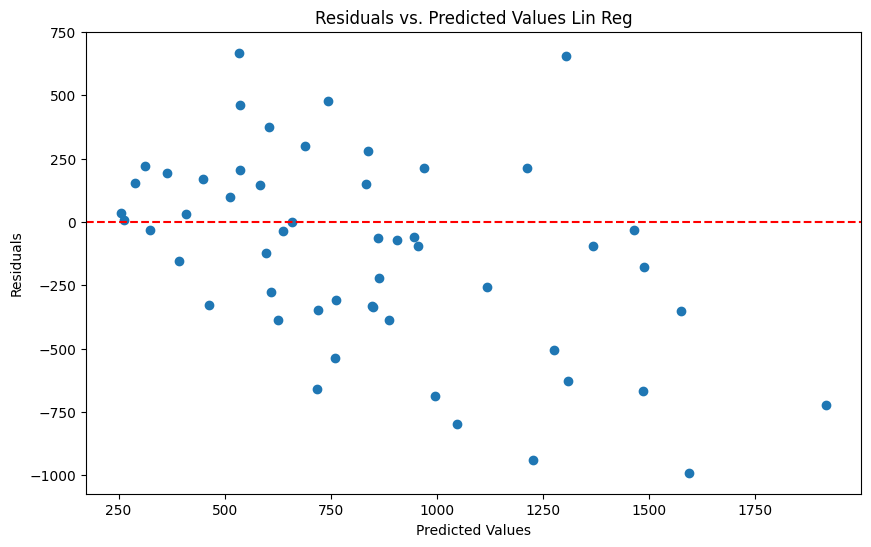

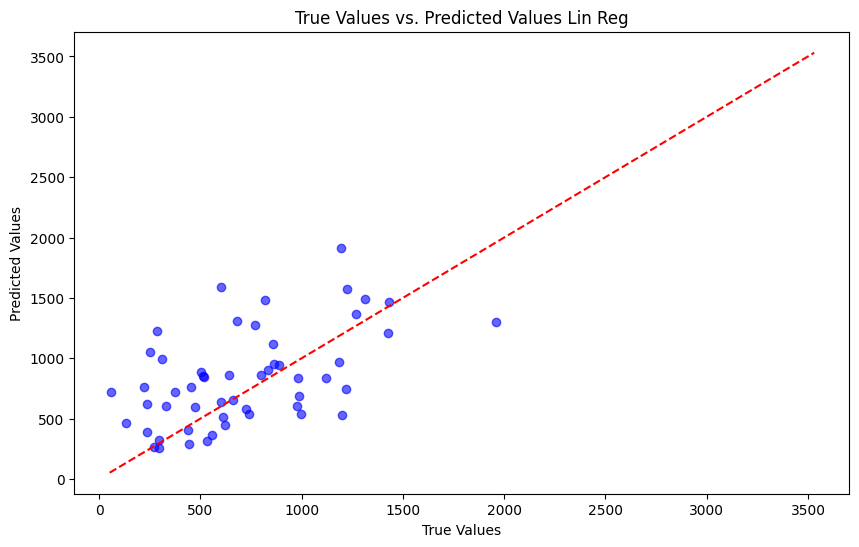

In [1705]:
# linear regression MEDIUM CITIES
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

# # show metrict for regression quality
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_pred.shape
plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('y_test vs y_pred Lin Reg')
plt.xlabel('Percent Not Graduated High School')
plt.ylabel('Violent Crimes Per Population')
plt.show()

plt.show()

residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Lin Reg')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('True Values vs. Predicted Values Lin Reg')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()